# Metody kernelowe

<h3 id=tocheading>Spis treści</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [3]:
# -*- coding: utf-8 -*-

from __future__ import unicode_literals
from __future__ import print_function
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from bokeh.io import gridplot, output_file, show, hplot, vplot
from bokeh.plotting import figure, output_notebook, vplot
from bokeh.charts import Scatter

In [4]:
output_notebook()

Loading BokehJS ...

# Uogólnione modele liniowe
---
* uogólniony model liniowy ma zwykle postać
$$\hat{y}(x)=\theta_0+\sum_{k=1}^K\theta_k\phi_k(x)$$
gdzie $\phi_k()$ są __wstępnie zdefiniowanymi__ nieliniowymi funkcjami
  * $\phi_k()$ mogą być wielomianami
  * jeśli funkcje będą miały postać $x_1^{p_1}x_2^{p_2}\dots x_l^{p_l}$ z ograniczeniem $p_1+p_2+\dots+p_m\leq r$, to razem czynników bedzie $$K=\frac{(l+r)!}{r!}$$
    * dla $l=10, r=3$ jest to już $K=286$
      * będzie więc bardzo dużo parametrów do ustalenia
  * użycie wielomainów jest uzasadnione tym, że każda ciągła funkcja może być dowolnie dokładnie aproksymowana wielomianami
  
* takie funkcje bazowe muszą być jednak __wstępnie__ wybrane
  * funkcje są także sutalone dla danych i __nie są__ zależne od ich postaci
  * wykorzystanie __ustalonych__ funkcji uniemożliwia zminimalizowanie błędu __poniżej__ pewnego progu
  * rozwiązaniem są __funkcje zależne od oryginalnych danych__
    * przykładem rozwiązania są sieci neuronowe
    
  * w takich przypadkach
    * modele stają się nieliniowe
    * są jednak trudniejsze w optymalizaji

# Twierdzenie Covera
* rozwinięcie wejscia o ustalone funkcje bazowe
  * pozwala osiągnąć lepszy błąd w problemach regresji
  * argumenty teorii aproksymacji nie mają zastosowania w klasyfikacji
    * niech dany będzie problem binarny $y\in\{-1,+1\}$
    * __nie jest__ istotne by $\hat{y}$ było (prawie) równe $+1$ czy $-1$
    * wystarczy, że jest bliższe poprawnej odpowiedzi, niż niepoprawnej
    
    
    ---
* punkty $x_1,x_2,\dots,x_N\in\mathbb{N}^l$ są w __uogolnionym położeniu__ (ang. general position), jeśli __nie__ istnieje podzbiór $l+1$ punktów leżących na $(l-1)$-wymiarowej hiperpłaszczyźnie
  * jeśli punkty są na płaszczyźnie, to __nie__ mogą 3 punkty leżeć na jednej prostej
  * jeśli w $\mathbb{R}^3$, to 4 punkty __nie__ mogą leżeć na jednej hiperpłaszczyźnie
  > Twierdzenie (Covera) Liczba wszystkich możliwychgrupowań (__dychotomii__) $O(N, l)$, które mogą być utworzone przez $(l-1)$-wymiarowe hiperpłaszczyzny dla rozdzielenia $N$ punktów na __dwie__ klasy jest dana przez $$O(N,l)=2\sum_{i=0}^l\binom{N-1}{i}$$ 
  gdzie 
  
  $$\binom{N-1}{i}=\frac{(N-1)!}{(N-i-1)!i!}$$
  
    * twierdzenie Covera mówi o __pojemności__ modelu klasyfikatora
    * to jest podział __liniowy__
      * stąd mówimy o problemach __liniowo separowalnych__
    * każdy podział jest liczony dwukrotnie: punktu z jednej klasy mogą należec do klasy $c_1$ lub do $c_2$
    * dla 4 punktów na płaszczyźnie mamy $O(4,2)=14$
    * wszystkich możliwych kombinacji $N$ punktów na 2 grupy jest $2^N=16$
      * a więc niektórych brakuje?
    * dla $N\leq l+1$ zachodzi $O(N,l)=2^N$ (a więc wszystkie)
    
  > Dla $N$ punktów w $l$-wymiarowej przestrzeni, prawdopodobieństwo podzielenia punktów na dwie liniowo separowalne klasy wynosi 
  $$P(N,l)=\frac{O(N,l)}{2^N}=\left\{\array{\frac{1}{2^{N-1}}\sum_{i=0}^l\binom{N-1}{i}&N>l+1\\1&N\leq l+1}\right.$$

  <img src="cover_theorem.png" width="90%"/> [Za Theodoridis]
  
  * $r=N/(l+1)$ czyli stosunek liczby punktów do wymiarowości plus jeden
  * dla $r\leq1$ jest zawsze pewność podziału
  * dla $r=2$ czyli $N=2(l+1)$ prawdopodobieństwo jest zawsze $\displaystyle\frac{1}{2}$
    * $O(2(l+1),l)=2^{2l+1}$
  * dla przestrzeni o __wyższym wymiarze__ krzywa jest bardziej stroma
    * prawdopodobieństwo liniowego podziału dąży równomiernie do jedności wraz ze wzrostem wymiaru przestrzeni!
    
    
    
* jak można wykorzystać twierdzenie Covera?
  * utworzyć mapowanie
  $$\phi:\mathbb{R}^l\longrightarrow\mathbb{R}^K\;\;K\gg l$$
  * im większe $K$, tym większa powinna być szansa na rozdzielenie zadanych punktów
  * czy jednak na pewno jest to rozwiązanie na wszelkie problemy?
    * przykładowe 
    $$\phi:\mathbb{R}^2\ni[x_1,x_2]\longrightarrow
    [x_1,x_2,4\exp(-(x_1^2+x_2^2)/3)+5]\in\mathbb{R}^3$$
    <img src="cover_mapping.png" width="100%"/>[Za Theodoridis]
      * punkty są wyraźnie separowalne
      * punkty leżą na rozmaitości o __oryginalnym wymiarze__!
        * nie możemy oszukać natury "dodając" informację, której przecież nie ma!
        * możemy jednak "dodając" cechy wyekstrahować informację normalnie niedostępną dla klasyfikatorów danego typu
        

* w wysokich wymiarach trzeba dopasować dużą liczbę parametrów
  * to grozi nadmiernym dopasowaniem i słabą generalizacją
  * potrzebne są procedury ostrożnego zwiększania wymiaru
    * nowe wymiary muszą zależeć od danych
    * koniecznie trzeba zastosować silne procedury __regularyzacji__ dla redukcji zbędnych parametrów

# Hiperpłaszczyzny rozdzielające

* zwykle problemy liniowo separowalne mogą mieć __nieskończenie wiele__ hiperpłaszczyzn rozdzielających (patrz rysunek w wykładzie o klasyfikacji)
  * rozwiązanie na rysunku ma postać
  $$\{x: \theta_0+\theta^Tx=0\}$$
  * jeden-dwa przykłady (spośród tych na rysunku!) są zwykle klasyfikowane nieprawidłowo
  * wektor $\theta^\ast=\theta/\|\theta\|$ jest normalny do hiperpłaszczyzny, stąd
  $$\theta^Tx_0+\theta_0=0\;\Longrightarrow\;\theta^Tx_0=-\theta_0$$
  dla $x_0$ leżących na hiperpłaszczyźnie rozdzielających
  * odległość dowolnego punktu od hiperpłaszczyzny to
  $$\begin{align}
  \theta^{\ast^T}(x-x_0)&=\frac{1}{\|\theta\|}(\theta^Tx-\theta^Tx_0)\\
  &=\frac{1}{\|\theta\|}(\theta^Tx+\theta_0)=\frac{1}{\|g'(x)\|}g(x)
  \end{align}$$
  gdzie $g(x)=\theta_0+\theta^Tx=0$ jest hiperpłaszczyzną rozdzielającą
    * $g(x)$ jest __proporcjonalne__ do odległości $x$ od hiperpłaszczyzny rozdzielającej

In [161]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, SVR

In [49]:
def plot_hyperplane(c, color, xmin, xmax, coef, intercept):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", lw=4, color=color)
    
def simple_separation():
    def line(x0):
        return (-(x0 * coef[0, 0]) - intercept) / coef[0, 0]

    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    data = [[.2, .2, -1], [.25, .4, -1], [.3, .65, -1], [.6, .6, -1], [.55, .625, -1],
            [.05, .05, -1], [.07, .1, -1], [.1, .45, -1], [.12, .3, -1], [.12, .1, -1], [.3, .07, -1,],
            [.025, .025, -1], [.1, .05, -1], [.05, .25, -1], [.15, .2, -1],
            [.5, .8, +1], [.7, .9, +1], [.8, .8, +1], [.85, .85, +1], [.9, .75, +1],
            [.2, .85, +1], [.5, .75, +1]]
    data = np.array(data)
    
    # simple linear classifier part
    clf = SGDClassifier(alpha=0.005, n_iter=100)
    clf.fit(data[:, :-1], data[:, -1])
    coef = clf.coef_
    intercept = clf.intercept_
    
    colors = ['orange', 'navy']
    for i, color in zip(clf.classes_, colors):
        idx = np.where(data[:, -1] == i)
        ax.scatter(data[idx, 0], data[idx, 1], c=color, marker='o', s=64, alpha=0.6,
                   cmap=plt.cm.Paired)

    for i, color in zip(clf.classes_[:-1], colors):
        plot_hyperplane(i, color, xmin=0.0, xmax=1.0, 
                        coef=clf.coef_, intercept=clf.intercept_)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    
    print("SGD coefficients:", clf.coef_, clf.intercept_)
    normal_vector = clf.coef_[0] / np.sqrt(np.dot(clf.coef_[0], clf.coef_[0]))
    normal_length = -clf.intercept_[0] / np.sqrt(np.dot(clf.coef_[0], clf.coef_[0]))
    normal_scaled = normal_vector * normal_length
    ax.arrow(0, 0, normal_scaled[0], normal_scaled[1], ls='--', lw=2, 
             color='orange', length_includes_head=True)

    # a simple SVC
    svc = SVC(kernel=str('linear'), C=1000) #, C=0.5, class_weight='balanced')
    X = data[:, :-1]
    Y = data[:, -1]
    svc.fit(X, Y)
    print("SVC coefficients:", svc.coef_, svc.intercept_)
    svc_normal = svc.coef_[0] / np.sqrt(np.dot(svc.coef_[0], svc.coef_[0]))
    svc_normal_length = -svc.intercept_[0] / np.sqrt(np.dot(svc.coef_[0], svc.coef_[0]))
    svc_normal_scaled = svc_normal * svc_normal_length
    ax.arrow(0, 0, svc_normal_scaled[0], svc_normal_scaled[1], ls='--', lw=1, 
             color='black', length_includes_head=True)
    w = svc.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0.0, 1.0)
    yy = a * xx - (svc.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = svc.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = svc.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
            s=196, facecolors='none')
    
    
    plt.show()

/Users/igorpodolak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


SGD coefficients: [[ 0.86582664  5.15544261]] [-3.68006681]
SVC coefficients: [[  1.66715124  16.66563299]] [-12.33285176]


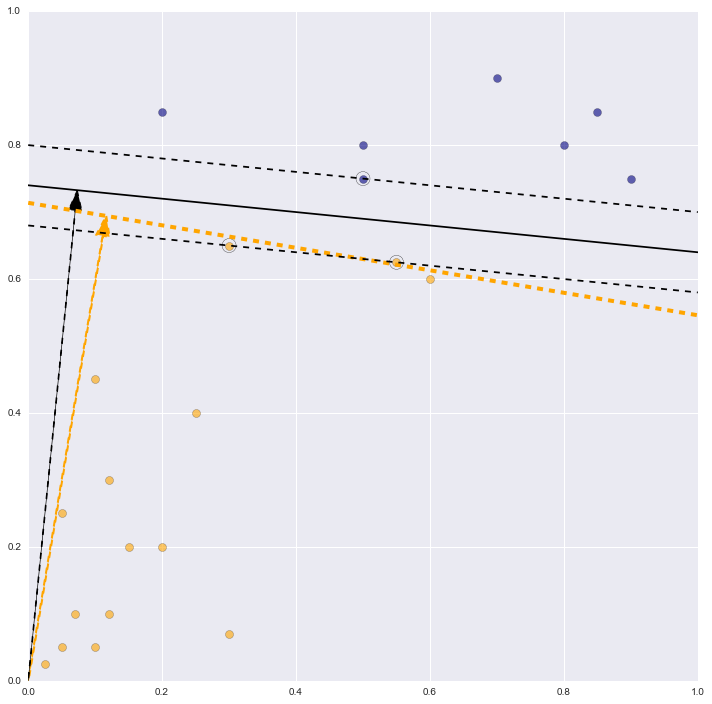

In [51]:
simple_separation()

## Algorytm perceptronu
* pomysł Franka Rosenblatta z 1957 roku
* perceptron realizuje funkcję 
$$y=\theta_0+\theta^Tx$$
dla $y\in\{-1,1\}$
  * jeśli $x_n$ jest __niepoprawnie__ klasyfikowany, to przykład jest __dodawany__ (__odejmowany__) od wektora parametrów (wag) $\theta$
  $$\begin{align}
  [\theta, \theta_0]&=[\theta,\theta_0]+\eta[y_nx_n, y_n]\\
  &=\eta{}y_n[x_n, 1]
  \end{align}$$
  dla $\eta>0$
  * czynnik $\eta y_n<0$ jeśli następuje __niepoprawna__ klasyfikacja
  * to jest w rzeczywistości algorytm __stochastycznego spadku gradientu__!
  
  * jeśli problem jest liniowo separowalny, to algorytm znajduje rozwiązanie w __skończonej__ (choć możliwe, że w bardzo dużej) liczbie kroków
  * algorytm znajdzie dowolne rozwiązanie, które niekoniecznie będzie optymalne
    * ale co to znaczy, że optymalne?
    
> Frank Rosenblatt (1928-1971) psycholog amerykański, pracował na Cornell jako kognitywista, pracował w dziedzinie sztucznej inteligencji, najlepiej znany za propozycję perceptronu
> <div>
<img src="rosenblatt.png" width="50%"/>
<img src="perceptron.png" width="50%"/>
</div>

## Klasyfikator o maksymalnym marginesie funkcjonalnym
---

> __Optymalna__ hiperpłaszczyzna rozdzielająca prawidłowo rozdziela klasy oraz __maksymalizuje__ odległość między najbliższymi przykładami z dwóch klas

---
* problem wygląda więc następująco
$$\begin{align}
\underset{\theta,\theta_0,\|\theta\|=1}{\max}&M\\
\text{pod warunkiem}\;y_n(\theta^Tx_n+\theta_0)&\geq{}M\;\;n=1,\dots,N 
\end{align}$$
* mnożąc lewą stronę przez $\displaystyle \frac{1}{\|\theta\|}$ dostajemy po lewej stronie odległość $x$ od hiperpłaszczyzny rozdzielającej
  * lewa strona to odległość $x$ ze znakiem ($y\in\{-1,+1\}$)
  * to pozwala usunąć warunek $\|\theta\|=1$
  $$\frac{1}{\|\theta\|}y_n(\theta^Tx_n+\theta_0)\geq{}M$$
  
* dowolne skalowanie $\theta$ (bez zmiany kierunku) też będzie spełniać warunek
  * niech $g(x;\theta,\theta_0)=\theta^Tx+\theta_0$ jest równaniem hiperpłaszczyzny rozdzialającej dla $g(x;\theta,\theta_0)=0$, to $[\lambda\theta,\lambda\theta_0]$ dla $\lambda\in\mathbb{R}^+$ też będzie wyznaczać hiperpłaszczyznę rozdzialającą
  * niech więc $\displaystyle \|\theta\|=1/M$
  * zamieniamy maksymalizację na minimalizację otrzymując warunek na __klasyfikator maksymalizującym margines funkcjonalny__
  $$\boxed{\begin{align}
    \underset{\theta,\theta_0}{\min}&\frac{1}{2}\|\theta\|\\
    \text{pod warunkiem}\;y_n(\theta^Tx_n+\theta_0)&\geq{}1\;\;n=1,\dots,N 
  \end{align}\;}$$
  
  
* ten problem optymalizacyjny ma
  * kwadratowe kryterium optymalizacyjne
  * liniowe ograniczenia
  * można więc zapisać jako funkcję Langrange'a
  $$L_P=\frac{1}{2}\|\theta\|-\sum_{n=1}^N\alpha_n[y_n(\theta^Tx_n+\theta_0)-1]$$
  * minimalizując ze względu na $\theta$ i $\theta_0$
  $$\begin{align}
  \frac{\partial L_P}{\partial\theta}=&\;\theta-\sum_n\alpha_ny_nx_n\\
  &\theta=\sum_n\alpha_ny_nx_n\\
  \frac{\partial L_P}{\partial\theta_0}=&\sum_n\alpha_ny_n=0
  \end{align}$$
  
  * podstawiając do $L_P$
  $$\boxed{\begin{align}
  L_D&=\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m-\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m+\sum_n\alpha_n\\
  &=\sum_n\alpha_n-\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m\\
  \text{pod warunkiem}\;\;&\sum_n\alpha_ny_n=0\;\text{oraz}\;\alpha_n\geq0\\
  \text{a także}\;\;&\alpha_n[y_n(\theta^Tx_n+\theta_0)-1]=0\;\forall{}n
  \end{align}\;}$$
  * $L_D$ jest postacią __dualną__ do $L_P$
  * te warunki (wraz z zerowaniem pochodnych) nazywamy __warunkami Karusha-Kuhna-Tuckera__:
    $$\begin{align}
    \left.\frac{\partial}{\partial\theta}L(\theta,\alpha)\right|_{\theta=\theta^{\ast}}&=0\\
    \alpha_n&\geq0\hspace{2ex}\forall\;n\\
    \alpha_n f(\theta^{\ast})&=0\hspace{2ex}\forall\;n
    \end{align}$$
    * warunki KKT zapewniają równoważność problemów pierwotnego i dualnego
  * łatwo zauważyć, że
    * jeśli $\alpha_n>0$, to $y_n(\theta^Tx_n+\theta_0)=1$, a więc $x_n$ leżą dokładnie w odległości $1$ od granicy decyzyjnej
    * jeśli $y_n(\theta^Tx_n+\theta_0)>1$, to $alpha_n=0$
    * rozwiązanie jest podane jako __liniowa kombinacja__ przykładów leżących __dokładnie__ na brzegu marginesu funkcjonalnego
      * te przykłady nazywamy __wektorami podtrzymującycmi__ (ang. __support vectors__)
      * przykłady poprawnie klasyfikowane __nie mają bezpośredniego__ wpływu na rozwiązanie
      * szerokość marginesu funkcjonalnego wynosi $\displaystyle \frac{1}{\|\theta\|}+\frac{1}{\|\theta\|}$
    * w szczególności w rozwiązaniu pojawiają się jedynie iloczyny skalarne $x_n^Tx_m$ wszystkich par wektorów
    * wartość biasu $\theta_0$ nie pojawia się w rozwiązaniu, stąd trzeba je znaleźć z postaci pierwotnej problemu
    $$\boxed{\theta_0=-\frac{1}{2}\left[\underset{y_n=+1}{\max}\theta^Tx_n+\underset{y_n=-1}{\max}\theta^Tx_n\right]\;}$$
    * taka postać rozwiązania pozwala na przedstawienie go z użyciem kerneli
    * maksymalizowana funkcja kosztu jest wypukła
      * w związku z tym rozwiązanie jest __jednoznaczne__
      * nie ma minimów lokalnych jak w modelach takich jak sieci neuronowe
    
    
    
* rozwiązanie __klasyfikatora o maksymalnym marginesie ma postać
  $$\boxed{h(x;\theta,\theta_0)=\sum_{n\in{}SV}\alpha_ny_n<x,x_n>+\theta_0\;}$$
  gdzie $SV$ oznacza zbiór wektorów podtrzymujących
* to rozwiązanie jest możliwe tylko dla problemów liniowo separowalnych


In [159]:
def simple_linear_svc():
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    
    data = [[.2, .2, -1], [.25, .4, -1], [.3, .65, -1], [.55, .45, -1], [.5, .5, -1],
            [.05, .05, -1], [.07, .1, -1], [.1, .45, -1], [.12, .3, -1], [.12, .1, -1], [.3, .07, -1,],
            [.025, .025, -1], [.1, .05, -1], [.05, .25, -1], [.15, .2, -1],
            [.5, .8, +1], [.7, .9, +1], [.8, .8, +1], [.85, .85, +1], [.9, .75, +1],
            [.2, .85, +1], [.5, .75, +1]]
    data = np.array(data)
    X = data[:, :-1]
    Y = data[:, -1]
    clf = SVC(kernel=str('linear'), C=1, gamma=2)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0, 1)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')
    clf_norm = np.sqrt(np.dot(clf.coef_[0], clf.coef_[0]))
    svc_normal = clf.coef_[0] / clf_norm
    svc_normal_length = -clf.intercept_[0] / clf_norm
    svc_normal_scaled = svc_normal * svc_normal_length
    ax.arrow(0, 0, svc_normal_scaled[0], svc_normal_scaled[1], ls='--', lw=1, 
             color='black', length_includes_head=True)


    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
              s=196, facecolors='none')
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=64, cmap=plt.cm.Paired)
    #ax.set_xlim([0.0, 1.0])
    #ax.set_ylim([0.0, 1.0])

    ax.axis('tight')
    plt.show()

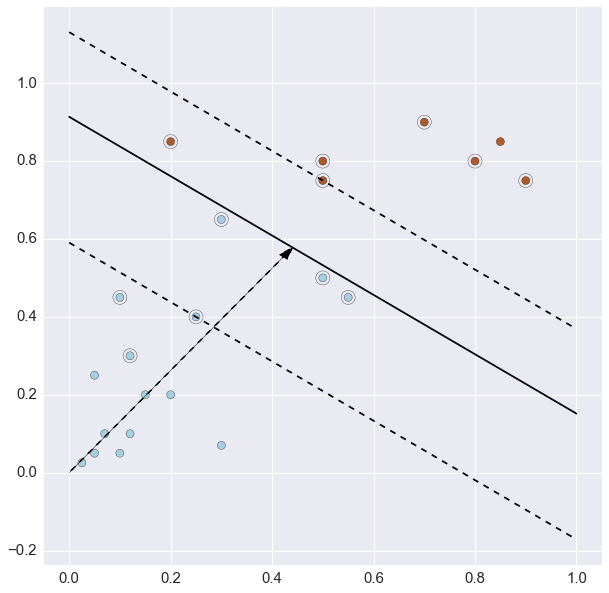

In [160]:
simple_linear_svc()

# Postać dualna problemu
* metody zwykle były __parametryczne__: dla modelu wyszukiwany (uczony w iteracyjnym zwykle procesie) wektor __parametrów__ (albo __wag__ w sieciach neuronowych) i rozwiązanie ma postać $$\hat{y}=f(x, w)$$
* modele mogą także __zapamiętywać__ przykłady uczące (albo ich część) i budować z tego modele oparte na gęstości
  * Parzen z kombinacją funkcji ___jądra___ wokół przykładów uczących
  * k-sąsiadów
    * modele _pamięciowe_ z ustaloną funkcją odległości
    
* modele mogą być przedstawione w __równoważnej__ postaci __dualnej__
  * predykcje są liniowymi kombinacjami funkcji __jądra__ obliczanych w punktach danych $$k(x_1, x_2)=\Phi(x_1)^T\Phi(x_2)$$
* tzw. __kernel trick__ pozwala na budowę nowych funkcji jądra __bez__ konieczności budowy funkcji cech
  * funkcje jądra mogą zapewniać pewne żądane cechy, np. inwariantność na obrót, translację, itp.
  * ułatwienie obliczeń
  
> Skąd nazwa __kernel__? Pochodzi z pierwszego użycia tego typu funkcji przez Hilberta w badaniach nad operatorami całkującymi: _funkcja $k()$ która powoduje powstanie operatora $T_k$ poprzez $$(T_kf)(x)=\int_\mathcal{X}k(x,y)f(y)dy$$ jest nazywana __kernelem__ operatora $T_k$_.

## Perceptron
* Rosenblatt (1956) zaproponował model __perceptronu__
  * model uczony w trybie __online__
    * poprawianie błędów dla kolejnych przykładów
    * dla problemów __liniowo separowalnych__ algorytm __gwarantuje__ znalezienie rozwiązania
  * rozwiązuje problemy binarne dla $y\in\{-1,+1\}$
  $$y(x)=\left\{\array{-1&<w\cdot x>+b<0\\1&<w\cdot x>+b>0}\right.$$
  
  
  
---

### postać pierwotna algorytmu uczenia perceptronu

* $y * (w^T x + b) >0$ oznacza __prawidłową__ klasyfikację
```python
w=0, b=0
R=max_i ||x_i||
modified = True
while modified:
    modified = False
    for i in range(N):
        if y_i*(w^T x + b) <= 0:
            modified = True
            w = w + eta y_i x_i
            b = b + eta y_i R^2
```      
  * co właściwie robi algorytm?
    * dla każdego __źle__ zaklasyfikowanego przykładu 
      * __dodaje__ $x_i$ ze stałą uczącą, jeśli przykład z klasy $+1$
      * __odejmuje__ $x_i$ ze stałą uczącą, jeśli przykład z klasy $-1$
    * odpowiada to __obrotowi__ hiperpłaszczyzny rozdzielającej
    * model ma więc postać $$\boxed{w=\sum_{i=1}^N\alpha_iy_ix_i\;}\tag{*}$$
  * znaleziona hiperpłaszczyzna $(w, b)$ jest płaszczyzną decyzyjną
  * najmniejszą odległość od jednego z przykładów od hiperpłaszczyzny nazywamy __marginesem funkcjonalnym__
    * model SVM będzie __maksymalizował__ margines funkcjonalny
---    
### postać dualna algorytmu uczenia perceptronu
```python
alpha=0, b=0
R=max_i ||x_i||
modified = True
while modified:
    modified = False
    for i in range(N):
        if y_i * (sum_k(alpha_i * y_i <x_k, x_i>) + b) <= 0:
            modified = True
            alpha_i = alpha_i + 1
            b = b + y_i R^2
```      
  * jeśli przykład $x_i$ jest źle klasyfikowany
    * przykłady częściej źle klasyfikowane będą dodawane częściej
    * przykłady nie sprawiające kłopotów nie będą w ogóle dodawane
      * to oczywiscie zależy od procesu uczenia i kolejności
    * o rozwiązaniu będą stanowić przykłady __blisko__ granicy decyzyjnej
      * wartość $\alpha_i$ może służyć do rangowania przykładów ze względu na ich zawartość informacyjną
    * prawdopodobnie wystarczą przykłady __najbliższe__!
  * model ma postać
  $$\boxed{\begin{align}
  \hat{y}(x)&=sgn(w^Tx+b)\\
  &=sgn\left(<\sum_{j=1}^N\alpha_jy_jx_j\cdot x>+b\right)\\
  &=sgn\left(\sum_{j=1}^N\alpha_jy_j<x_j\cdot x>+b\right)
  \end{align}\;}$$
  
* dla większości modeli liniowych istnieje postać dualna
* dane pojawiają się wyłącznie jako elementy __macierzy Grama__
$$K=\Phi\Phi^T\hspace{3ex} K_ij(x_i, x_j)=<\phi(x_i),\phi(x_j)>$$
* w postaci modelu dane uczące pojawiają się __jedynie__ przez istotność $\alpha_i$ ich iloczynu skalarnego z przykładem rozpoznawanym


* __mapowanie__ przykładów do __przestrzeni cech__ $\phi(x):X\longrightarrow H$ 
  * przestrzeń cech może być w niektórych wypadkach nieskończenie wymiarowa
  * loczyn skalarny obrazów w przestrzeni cech zapisany jako
  $$\boxed{<\phi(x_i),\phi(x_j)>=k(x,y)\;}$$
  nazywamy __kernel trick__
    * dzięki temu operacje w przestrzeni cech można wykonać w sposób bardzo efektywny poprzez operacje w przestrzeni o niższym wymiarze

## Jak zdefiniować funkcję jądra
1. poprzez $\phi()$ 
$$k(x,y)=<\phi(x),\phi(y)>=\phi(x)^T\phi(y)=\sum\phi_i(x)\phi_j(y)$$
  * to jednak wymaga zdefiniowania $\phi$ i złożonych obliczeń
2. __wprost__ $$k(x,y)=(x^Ty)^2$$
  * to wymaga pewności, że tak zdefiniowana funkcja jest poprawna
    * konieczna jest pewność, że dla tak zdefiniowanej funkcji __istnieje__ jakaś funkcja $\phi()$ taka, że można ją pokazać w postaci 1.
    * taka macierz musi być dodatnio półokreślona
    - [x] opisać czym jest dodatnia półokreśloność

### Pośrednie mapowanie do przestrzeni cech
* budująć model liniowy w przestrzeni $M$-wymiarowej cech szukamy __hipotezy__
$$\boxed{h(x)=\sum_{k=1}^M\theta_k\phi(x_k)+b\;}$$
* $\phi()$ jest jakimś odwzorowaniem z przestrzeni wejściowej do __przestrzeni cech__
* w postaci __dualnej__ hipoteza jest przedstawiona w postaci __relacji między przykładami uczącymi__ a wektorem $x$ dla którego obliczamy wartość
$$\boxed{h(x)=\sum_{n=1}^N\alpha_ny_n<\phi(x_n)\cdot\phi(x)>+b\;}$$
  * potrzebujemy metody __bezpośredniego__ obliczanie $<\phi(x_n)\cdot\phi(x)>$ __bez__ potrzeby obliczania przestrzeni cech
  > Funkcja __jądra__ $k$ jest funkcją dla $x, y\in X$ $$k(x,y)=<\phi(x_n)\cdot\phi(x)>,$$ gdzie $\phi$ jest odwzorowaniem z $X$ do przestrzeni cech $F$
  * dzięki funkcji jądra wymiar przestrzeni cech __nie będzie__  wpływał na złożoność obliczeniową
    * wymiar przestrzeni cech może być nawet nieskończony
    * nie ma potrzeby znajomości przestrzeni cech byle by istaniała
    * złożoność nie musi być zależna od wymiarowości przestrzeni cech
    * dane są mapowane __nie wprost__ do przestrzeni cech
    * wszystkie informacje o przykładach są przechowywane w macierzy Grama $K$
    * hipoteza będzie mieć teraz postać
    $$\boxed{h(x)=\sum_{n=1}^N\alpha_ny_nk(x_n,x)+b\;}$$

#### Funkcje jądra jako pośrednie mapowanie do przestrzeni cech
---
* iloczyn skalarny $<x\cdot y>$ jest przykładem jądra - funkcja jadra jest jego uogólnieniem
* modele będą zwykle potrzebowały wprowadzenia __nieliniowości__, można więc zaproponować jądro $<x\cdot y>^2$
$$\begin{align}
<x\cdot y>^2&=(x_1y_1+x_2y_2)^2\\
&=x_1^2y_1^2+2x_1y_1x_2y_2+x_2^2y_2^2\\
&=(x_1^2,\sqrt{2}x_1x_2,x_2^2)(y_1^2,\sqrt{2}y_1y_2,y_2^2)
\end{align}$$
  * zawiera wszystkie $\displaystyle \binom{M+p-1}{p}$ jednomianów stopnia $p$ dla $k(x,y)=<x\cdot y>^p$
* zmodyfikowane jądro
$$\begin{align}
<x\cdot y+c>^2&=(x_1y_1+x_2y_2+c)^2\\
&=x_1^2y_1^2+2x_1y_1x_2y_2+2cx_1y_1+x_2^2y_2^2+2cx_2y_2+c^2\\
&=(x_1^2,\sqrt{2}x_1x_2,\sqrt{2c}x_1,x_2^2,\sqrt{2c}x_2,c)(y_1^2,\sqrt{2}y_1y_2,\sqrt{2c}y_1,y_2^2,\sqrt{2c}y_2,c)
\end{align}$$
  * podobne wyprowadzenie można znaleźć gdy wykładnik $p>2$
    * każdy będzie się składał z $\displaystyle \binom{M+p}{p}$ składników  będących jednomianami rzędu do $p$ włącznie

### Różne bardziej znane kernele
* jądro __gausowskie__
$$k(x,y)=\exp\left(-\frac{\|x-y\|}{2\sigma^2}\right)$$
dla $\sigma>0$
  * nieskończony wymiar generowanej przestrzeni cech

In [54]:
def plot_gaussian_kernel():
    fig = plt.figure(figsize=(16, 10))
    ax = fig.gca(projection='3d')
    X = np.arange(-1, 1, 0.01)
    Y = np.arange(-1, 1, 0.01)
    X, Y = np.meshgrid(X, Y)

    sigma1 = 0.25
    Z1 = np.exp(-((X-Y) ** 2)/(2 * sigma1 ** 2))
    surf = ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=0.5)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    ax.view_init(45, 35)

    plt.show()

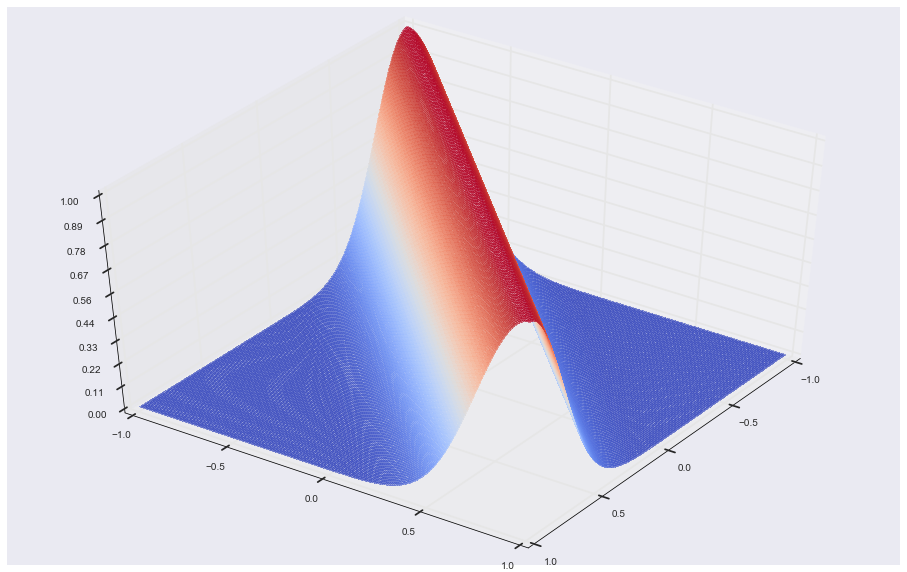

In [55]:
plot_gaussian_kernel()

* wielomianowe jednorodne
$$k(x,y)=<x\cdot y>^d$$
  * składa się z jednomianów rzędu $d$

In [56]:
def plot_homogenous_kernel():
    figwidth = 230
    figheight = 230
    x = np.linspace(0, 1, 100)
    aa1 = figure(width=figwidth, height=figheight, title=None)
    y = x**2
    aa1.line(x, y, line_width=2)

    aa2 = figure(width=figwidth, height=figheight, title=None)
    x = np.linspace(0, 1, 100)
    colors = ['blue', 'red', 'orange', 'navy', 'green']
    for k, x2 in enumerate([0.1, 0.3, 0.5, 0.7, 0.9]):
        y = np.sqrt(2) * x * x2
        aa2.line(x, y, line_width=2, color=colors[k])
        aa2.x(x2, 0, color=colors[k])

    aa3 = figure(width=figwidth, height=figheight, title=None)
    x = np.linspace(0, 1, 100)
    y = x ** 2
    aa3.line(x, y, line_width=2)

    fig = gridplot([[aa1, aa2, aa3]])
    show(fig)

In [57]:
plot_homogenous_kernel()

In [58]:
# a simple plot of a homogenous kernel <x, y>^2
def plot_homogenous_kernel_3d():
    fig = plt.figure(figsize=(16, 10))
    ax = fig.gca(projection='3d')
    X = np.arange(0, 1, 0.01)
    Y = np.arange(0, 1, 0.01)
    X, Y = np.meshgrid(X, Y)
    Z1 = X ** 2
    Z2 = np.sqrt(2) * X * Y
    Z3 = Y ** 2
    surf = ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=0.2)
    surf = ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    surf = ax.plot_surface(X, Y, Z3, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=0.2)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    plt.show()

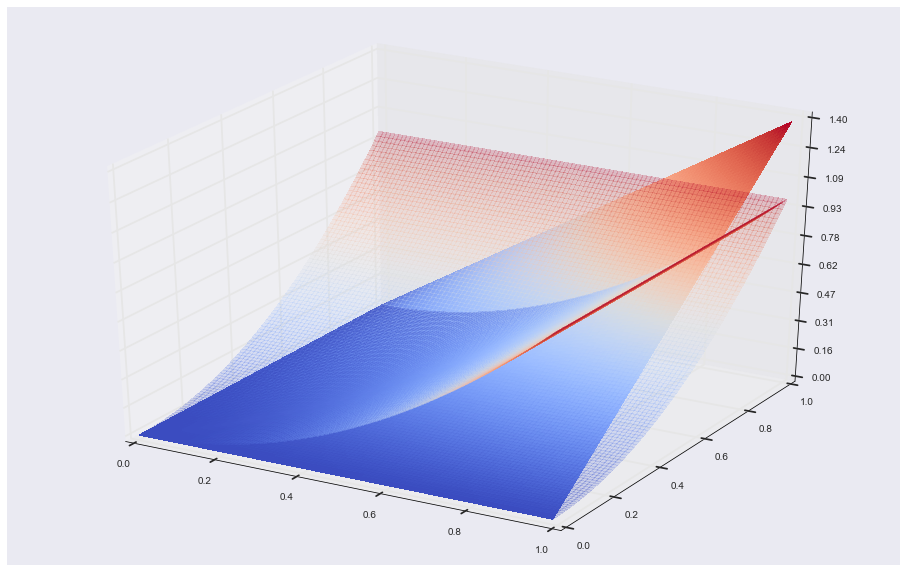

In [59]:
plot_homogenous_kernel_3d()

* wielomianowe niejednorodne
$$k(x,y)=<x\cdot y + c>^d$$
  * składa się z jednomianów __do__ rzędu $d$
  * wymiar przestrzeni cech dla jąder wielomianowych jest skończony

* Laplace'a
$$k(x,y)=\exp(t\|x-y\|)$$
dla $t>0$
  * wymiar przestrzeni cech nieskończony

* spline-wskie
$$k(x,y)=M_{2p+1}(\|x-y\|^2)$$
gdzie $B$ jest funkcją spline-owską zdefiniowaną przez konwolucje

* samplujące
$$sinc(x)=\frac{\sin \pi x}{\pi x}$$
szczególnie przydatne dla przetwarzania sygnałów

### Konieczne warunki na funkcję jądra
* __symetryczność__
$$k(x,y)=<\phi(x)\cdot\phi(y)>=<\phi(y)\cdot\phi(x)>=k(y,x)$$
* __nierówność Cauchego-Schwarza__
$$\begin{align}
k(x,y)^2&=<\phi(x)\cdot\phi(y)>^2\leq\|\phi(x)\|^2\|\phi(y)\|^2\\
&=<\phi(x)\cdot\phi(x)><\phi(y)\cdot\phi(y)>=k(x,x)k(y,y)
\end{align}$$
---
* te warunki __nie są wystarczające__ dla istnienia przestrzeni cech indukowanej przez kernel $k()$
  * niech $K=(k(x_i,x_j))_{i,j=1}^N$
  * macierz $K$ jest symetryczna, ponieważ funkcja $k()$ jest symetryczna
  * jeśli K jest symetryczna, to istnieje 
  $$K=V\Lambda V^T$$
  gdzie 
    * $V$ jest ortogonalną macierzą wektorów własnych
    * $\Lambda$ jest diagonalną macierzą wartości własnych
  * zdefiniujmy $\phi$
  $$\phi(x_k)=\left[\sqrt{\lambda_1}v_{1k},\dots,\sqrt{\lambda_i}v_{ik},\dots,\sqrt{\lambda_M}v_{Mk}\right]$$
  * wtedy
  $$\begin{align}<\phi(x_i)\phi(x_j)>&=\sum_k\sqrt{\lambda_k}v_{ki}\sqrt{\lambda_k}v_{kj}\\
  &=\left(V\Lambda V^T\right)_{ij}=k(x_i,x_j)
  \end{align}$$
  * tak więc macierz Grama $K$ musi mieć __nieujemne__ wartości własne, bo w przeciwnym wypadku dla 
  $$x=\sum_iv_{ki}\phi{x_i}=\sqrt{\Lambda}V^Tv_k$$ 
  dla $\lambda_k<0$ zachodzi
  $$\begin{align}
  \|x\|^2=<x\cdot x>&=v_k^TV\sqrt{\Lambda}\sqrt{\Lambda}V^Tv_k\\
  &=v^T_kKv_k=\lambda_k<0
  \end{align}$$
  co byłoby sprzecznością
 

### Jak tworzyć kernele z innych kerneli?
Jeśli $k_1()$ i $k_2()$ są poprawnymi kernelami nad $X$, a $k_3()$ jest poprawnym kernelem nad $\mathbb{R}\times\mathbb{R}$, to następujące funkcje też są poprawnymi kernelami
$$\begin{align}
1.&\hspace{2ex}k(x,y)=k_1(x, y)+k_2(x, y)\\
2.&\hspace{2ex}k(x,y)=c k_1(x,y), \hskip{2ex}c>0\\
3.&\hspace{2ex}k(x,y)=k_1(x,y)k_2(x,y)\\
4.&\hspace{2ex}k(x,y)=q(k_1(x,y))\\
5.&\hspace{2ex}k(x,y)=f(x)f(y), \hskip{3ex}f:X\rightarrow\mathbb{R}\\
6.&\hspace{2ex}k(x,y)=k_3(\phi(x),\phi(y))\\
7.&\hspace{2ex}k(x,y)=x^TAy
\end{align}$$
gdzie 
  * $p()$ jest wielomianem z dodatnimi współczynnikami
    * w szczególności $\exp(k(x,y))$ jest kernelem, bo $\exp()$ można aproksymować dowolnie dokładnie wielomianami z dodatnimi współczynnikami
  * $A$ jest dodatnio półokreśloną macierzą
  * $k_3():\mathbb{R}^l\times\mathbb{R}^l\longrightarrow\mathbb{R}$

* $k(x,y)=\exp(k_1(x,y))$ jest kernelem
  * funkcja wykładnicza może być dowolnie dokładnie przybliżona wielomianami o dodatnich wykładnikach
* 

### Kernele z cech
* innym sposobem jest utworzenie kerneli __z cech__
  * trzeba najpierw wyliczyć cechy, 
  * potem utworzyć iloczyn skalarny
  * __nie ma__ konieczności kontroli półokreśloności macierzy, ponieważ wynika ona bezpośrednio z definicji iloczynu
  
#### Kernel dla łańcuchów
* idea: _dwie sekwencje są do siebie podobne jeśli zawierają wiele takich samych podsekwencji_
* dany jest alfabet $\Sigma$
  * $s$ i $t$ są łańcuchami w $\Sigma^n$
  * podsekwencja $u$ łańcucha $s$ jest określona przez __multi-indeks__ $i=(i_1,i_2,\dots,i_{|u|})$ 
    * litery w $u$ występują w kolejności rosnącej w $s$, ale mogą wystąpić pomiędzy nimi przerwy
* określamy cechę $\phi_u(s)$ jako
  $$\phi_u(s)=\sum_{i:u=s[i]}\lambda^{l(i)}$$
  gdzie $0\leq\lambda\leq1$, $l(i)$ jest długością podsekwencji $u$ i jest sumą po wszystkich multi-indeksach odpowiadających $u$ w łańcuchu $s$
  * $l(i)$ jest liczbą znaków łańcucha $s$ na których jest rozłożona podsekwencja
    * $l(i)$ __nie jest__ równoważne $|u|$ (to jest liczba znaków w podsekwencji)
  * cechy mierzą liczbę podsekwencji w łańcuchu biorąc pod uwagę rozproszenie (przerwy)
* funkcja jądra
$$\begin{align}
k_n(s,t)&=\sum_{u\in\Sigma^n}<\phi_u(s)\cdot \phi_u(t)>\\
&=\sum_{u\in\Sigma^n}\sum_{i:u=s[i]}\lambda^{l(i)}\sum_{j:u=t[j]}\lambda^{l(j)}\\
&=\sum_{u\in\Sigma^n}\sum_{i:u=s[i]}\sum_{j:u=t[j]}\lambda^{l(i)+\lambda(j)}
\end{align}$$
sumuje się po wszystkich wspólnych podsekwencjach 
  * brana jest pod uwagę ich częstotliwość i rozproszenie
  
  
  
* taka definicja jest bardzo złozona obliczeniowo
  * możliwa jest jednak definicja rekurencyjna ze względu na indeks $n$ kernela
    * jej złożoność jest proporcjonalna do $n*|s|*|t|$

## Problem separowalny w przestrzeni cech
* jeśli problem jest separowalny
  * problem jest do rozwiązania z wykorzystaniem maksymalizacji marginesu
  $$\boxed{\begin{align}
  L_D&=\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m-\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m+\sum_n\alpha_n\\
  &=\sum_n\alpha_n-\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m\\
  \text{pod warunkiem}\;\;&\sum_n\alpha_ny_n=0\;\text{oraz}\;\alpha_n\geq0\\
  \text{a także}\;\;&\alpha_n[y_n(\theta^Tx_n+\theta_0)-1]=0\;\forall{}n
  \end{align}\;}$$
  i model ma postać
  $$\boxed{h(x;\theta,\theta_0)=\sum_{n\in{}SV}\alpha_ny_n<x,x_n>+\theta_0\;}$$
  * rozwiązanie jest dane przez iloczyn skalarny
  > Jeśli problem jest liniowo separowalny w przestrzeni indukowanej przez iloczyn skalarny $k(x,y)$, to problem jest rozwiązywany przez maksymalizację $$\boxed{\begin{align}
  L_D&=\sum_n\alpha_n-\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_mk(x_n,x_m)\\
  \text{pod warunkiem}\;\;&\sum_n\alpha_ny_n=0\;\text{oraz}\;\alpha_n\geq0\;\forall{}n
  \end{align}\;}$$ i model ma postać $$\boxed{h(x;\theta,\theta_0)=\sum_{n\in{}SV}\alpha_ny_nk(x,x_n)+\theta_0\;}$$
  
  
  ----
* procedura leave-one-out sugeruje pewne ograniczenie na __oczekiwaną generalizację__
  * jeśli przykład, który __nie jest__ wektorem podtrzymującym zostanie usunięty ze zbioru przykładów, to i tak zostanie prawidłowo zaklasyfikowany
  * stąd oczekiwany poziom gemeralizacji powinien wynosić $\displaystyle\frac{|SV|}{N}$
    * im mniej wektorów podtrzymujących, tym lepszy powinien być poziom generalizacji
    
* klasyfikator __nie stara__ się minimalizować liczby wektorów podtrzymujących
  * jest ich zwykle niewiele

## Problemy nieseparowalne
* klasyfikator maksymalizujący margines funkcjonalny jest nie do wykorzystania gdy problem __nie jest__ liniowo separowalny
  * błąd czuący takiego klasyfikatora jest __zawsze__ zerowy!
  * nawet nieduży szum danych uniemożliwi rozwiązanie
  * można pozwolić na rozwiązanie przez wprowadzenie __zmiennych rozluźniających__ $\xi_n$ (ang. slack variables) i przedstawienie problemu
  $$\boxed{\begin{align}
    \underset{\theta,\theta_0}{\arg\min}&\frac{1}{2}\|\theta\|\\
    \text{pod warunkiem}\;y_n(\theta^Tx_n+\theta_0)&\geq{}1-\xi_n\;\;n=1,\dots,N\\
    &\xi_n\geq0,\;\forall n
  \end{align}\;}$$
  co można przeformułować
  $$\boxed{\begin{align}
    \underset{\theta,\theta_0}{\arg\min}&\frac{1}{2}\|\theta\|+C\sum_{n=1}^N\xi_n^2\\
    \text{pod warunkiem}\;y_n(\theta^Tx_n+\theta_0)&\geq{}1-\xi_n\;\;n=1,\dots,N
  \end{align}\;}$$
  gdzie $C$ jest czynnikiem kosztu
    * to wymaga znalezienia $C$ zwykle poprzez szereg wartości i walidację krzyżową
      * wybór $C$ daje w efekcie optmalizację $\theta$
      * dla tej wartości $\|\theta\|$ optymalizaowana jest suma $\sum_n\xi_n$
      
      
* Lagrangian ma postać
$$L_D=\frac{1}{2}\|\theta\|+\frac{C}{2}\sum_n\xi_n^2-\sum_n\alpha_n[y_n(\theta^Tx_n+\theta_0)-1+\xi_n]$$
  * optymalizacja
  $$\begin{align}
  \frac{\partial L_P}{\partial \theta}&=\theta-\sum_n\alpha_ny_nx_n=0\\
  \frac{\partial L_P}{\partial \theta_0}&=\sum_n\alpha_ny_n=0\\
  \frac{\partial L_P}{\partial \xi}&=C\xi-\alpha=0
  \end{align}$$
  podstawiając dostajemy postać dualną
  $$\boxed{\begin{align}
  L_D=&\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_m<x_n,x_m>+\frac{1}{2C}<\alpha,\alpha>-\sum_n\sum_m\alpha_n\alpha_my_ny_m<x_n,x_m>\\
  &+\sum_n\alpha_n-\frac{1}{C}<\alpha,\alpha>\\
  =&\sum_n\alpha_n-\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_m<x_n,x_m>+\frac{1}{2C}<\alpha,\alpha>-\frac{1}{C}<\alpha,\alpha>
  \end{align}\;}$$
  z pozostałymi warunkami KKT
  $$\boxed{\alpha_n[y_n(<x_n,\theta>+\theta_0)-1+\xi]=0, \;\forall\;n\;}$$
  
  
  
* znowu dla wersji z jądrem otrzymujemy
> Niech dany będzie problem, jądro $k(x,y)$ indukujące przestrzeń cech i rozwiązanie problemu przez maksymalizację $$\begin{align}\text{maksymalizuj}\;&L(\alpha)=\sum_n\alpha_n-\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_m(k(x_n,x_m)+\frac{1}{C}\delta_{mn})\\\text{pod warunkiem}\;&\sum_n\alpha_ny_n=0\\&\alpha_n\geq0\;\forall\;n
\end{align}$$

In [64]:
sns.set(font_scale=1.5)

In [197]:
def try_svc():
    # Our dataset and targets

    data = [[.2, .2, -1], [.25, .4, -1], [.3, .65, -1], [.6, .6, -1], [.55, .625, -1],
            [.05, .05, -1], [.07, .1, -1], [.1, .45, -1], [.12, .3, -1], [.12, .1, -1], [.3, .07, -1,],
            [.025, .025, -1], [.1, .05, -1], [.05, .25, -1], [.15, .2, -1],
            [.5, .8, +1], [.7, .9, +1], [.8, .8, +1], [.85, .85, +1], [.9, .75, +1],
            [.2, .85, +1], [.5, .75, +1]]
    data = np.array(data)
    X = data[:, :-1]
    Y = data[:, -1]
    # figure number
    fignum = 1
    #ax = plt.subplots(3, 1, figsize=(21, 7))
    
    # fit the model
    for kernel, c in zip((str('linear'), str('poly'), str('rbf')),
                         (100, 100, 100)):
        clf = SVC(kernel=kernel, gamma=2, C=c)
        clf.fit(X, Y)

        # plot the line, the points, and the nearest vectors to the plane
        plt.figure(fignum, figsize=(9, 5))
        plt.clf()
        plt.title("{} kernel with C={}".format(kernel, c))
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10)
        plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

        plt.axis('tight')
        x_min = 0
        x_max = 1
        y_min = 0
        y_max = 1

        XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.05)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1.0, 0, 1.0])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        plt.show()

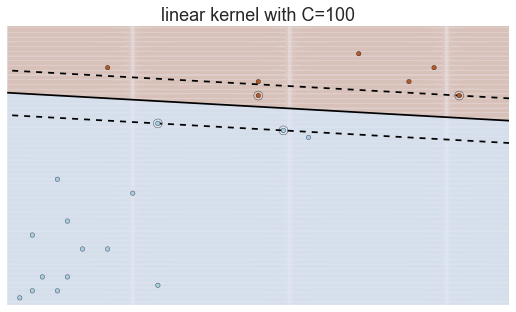

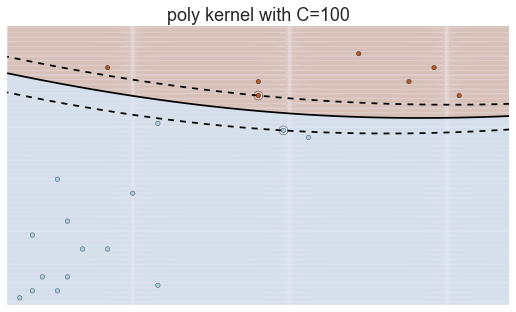

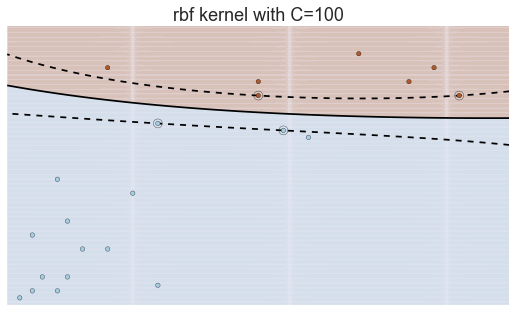

In [198]:
try_svc()

In [77]:
def svc_for_two_class(N=150):
    def f(x):
        return (x ** 3 + x ** 2 + x) / 30.
    xmin = ymin = -5.0
    xmax = ymax = +5.0
    X = np.array(np.random.uniform(low=xmin, high=xmax, size=2*N)).reshape((N, 2))
    noise = np.random.normal(scale=2, size=N)
    fval = f(X[:, 0])
    Y = np.array([-1] * N).reshape(-1)
    Y[np.where(fval + noise > X[:, 1])] = +1
    # fit the model
    kernels = (str('linear'), str('poly'), str('poly'), str('poly'),
               str('rbf'), str('rbf'))
    degrees = (1, 2, 3, 4, 0, 0)
    c_values = (10, 10, 10, 10, 20, 2)
    fig, ax = plt.subplots(len(kernels) / 2, 2, figsize=(20, 30))
    xx = np.linspace(xmin, xmax, 100)  
    
    if len(kernels) != len(degrees) or len(kernels) != len(c_values):
        return
    for n, kernel, c, degree in zip(range(len(kernels)), 
                                    kernels,
                                    c_values,
                                    degrees
                                   ):
        clf = SVC(kernel=kernel, gamma=20, degree=degree, C=c)
        clf.fit(X, Y)
        row = n / 2; col = n % 2
        ax[row, col].scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', 
                             cmap=plt.cm.Paired)
        ax[row, col].plot(xx, f(xx), ls='--', c='magenta')
        ax[row, col].set_xlim([xmin, xmax])
        ax[row, col].set_ylim([ymin, ymax])
        ax[row, col].scatter(clf.support_vectors_[:, 0], 
                             clf.support_vectors_[:, 1], s=80,
                             facecolors='none', zorder=10)
        title = '{} kernel with C={}'.format(kernel, c)
        if kernel == str('poly'):
            title = '{}, degree={} kernel with C={}'.format(kernel, degree, c)
        ax[row, col].set_title(title)
        
        XX, YY = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        ax[row, col].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.05)
        ax[row, col].contour(XX, YY, Z, colors=['k', 'k', 'k'], 
                    linestyles=['--', '-', '--'], levels=[-1., 0, 1.0])

    plt.tight_layout()
    plt.show()
    return

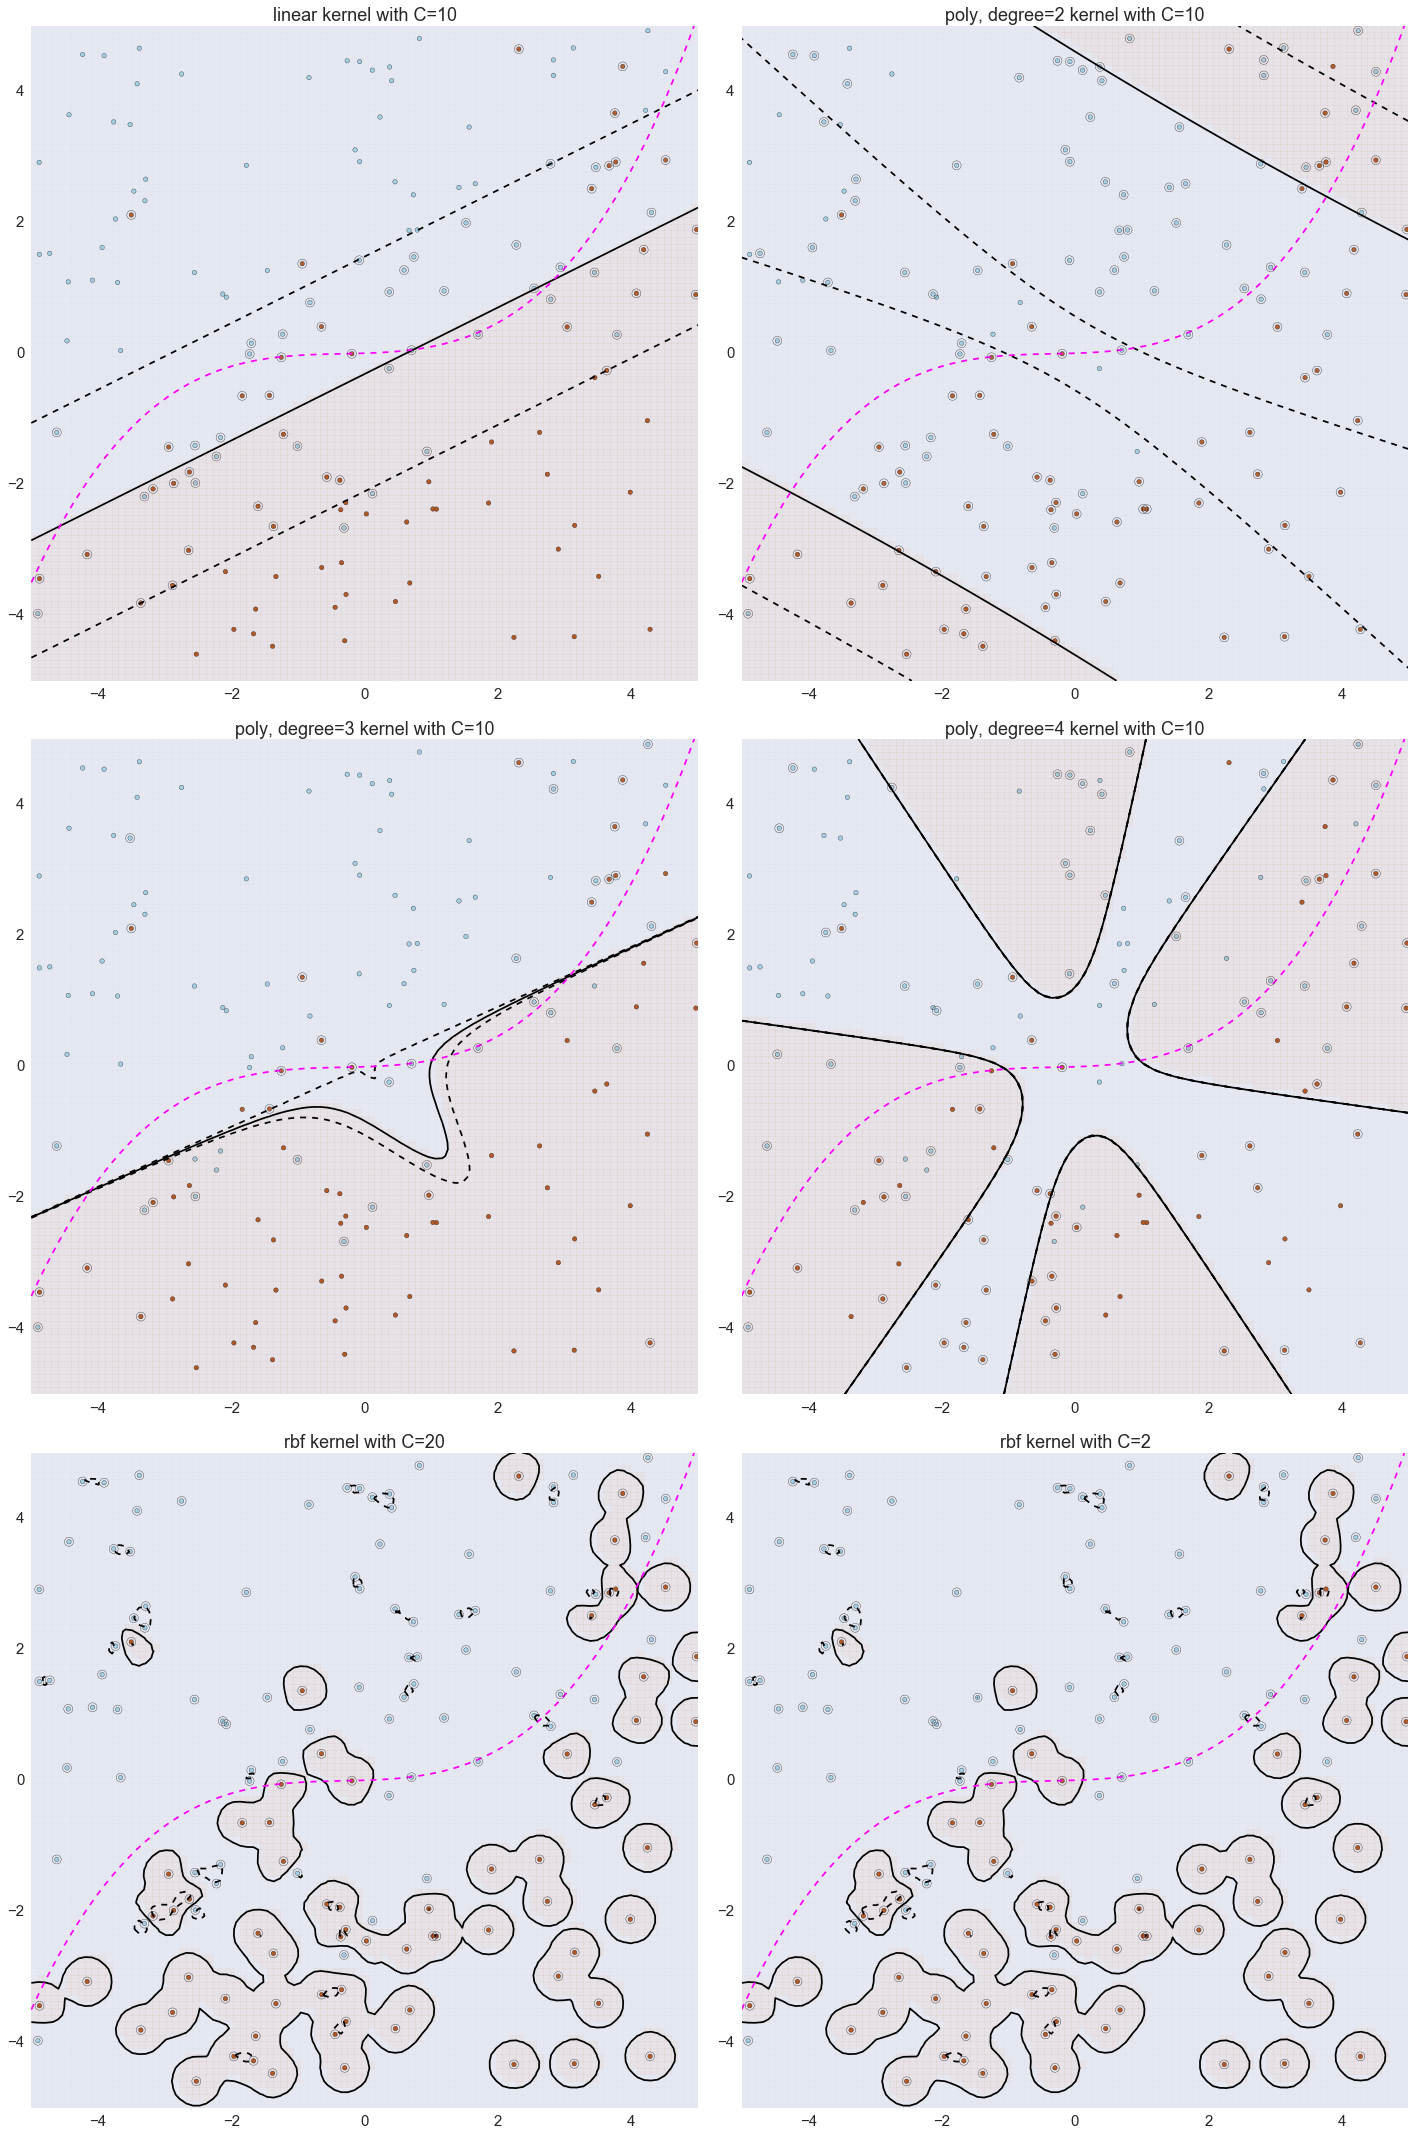

In [78]:
svc_for_two_class()

In [91]:
def svc_for_two_class_optimized(N=150):
    def f(x):
        return (x ** 3 + x ** 2 + x) / 30.
    xmin = ymin = -5.0
    xmax = ymax = +5.0
    X = np.array(np.random.uniform(low=xmin, high=xmax, size=2*N)).reshape((N, 2))
    noise = np.random.normal(scale=2, size=N)
    fval = f(X[:, 0])
    Y = np.array([-1] * N).reshape(-1)
    Y[np.where(fval + noise > X[:, 1])] = +1
    # fit the model
    kernels = (str('linear'), str('poly'), str('poly'), str('poly'),
               str('rbf'), str('rbf'))
    degrees = (1, 2, 3, 4, 0, 0)
    c_values = (10, 10, 10, 10, 20, 2)
    fig, ax = plt.subplots(len(kernels) / 2, 2, figsize=(20, 30))
    xx = np.linspace(xmin, xmax, 100)  
    
    if len(kernels) != len(degrees) or len(kernels) != len(c_values):
        return
    for n, kernel, c, degree in zip(range(len(kernels)), 
                                    kernels,
                                    c_values,
                                    degrees
                                   ):
        best_err = 100. * X.shape[0]
        best_c = c
        for try_c in np.linspace(0.1, 20., 5):
            clf = SVC(kernel=kernel, gamma=20, degree=degree, C=try_c)
            clf.fit(X, Y)
            err = clf.score(X, Y)
            print("{} ({}) c={} --> {}".format(kernel, degree, try_c, err))
            if err < best_err:
                best_err = err
                best_c = try_c
                
        clf = SVC(kernel=kernel, gamma=20, degree=degree, C=best_c)
        clf.fit(X, Y)
        row = n / 2; col = n % 2
        ax[row, col].scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', 
                             cmap=plt.cm.Paired)
        ax[row, col].plot(xx, f(xx), ls='--', c='magenta')
        ax[row, col].set_xlim([xmin, xmax])
        ax[row, col].set_ylim([ymin, ymax])
        ax[row, col].scatter(clf.support_vectors_[:, 0], 
                             clf.support_vectors_[:, 1], s=80,
                             facecolors='none', zorder=10)
        title = '{} kernel with C={}'.format(kernel, c)
        if kernel == str('poly'):
            title = '{}, degree={} kernel with C={}'.format(kernel, degree, 
                                                            np.round(best_c, 2))
        ax[row, col].set_title(title)
        
        XX, YY = np.mgrid[xmin:xmax:25j, ymin:ymax:25j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        ax[row, col].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.05)
        ax[row, col].contour(XX, YY, Z, colors=['k', 'k', 'k'], 
                    linestyles=['--', '-', '--'], levels=[-1., 0, 1.0])

    plt.tight_layout()
    plt.show()
    return

linear (1) c=0.1 --> 0.84
linear (1) c=5.075 --> 0.84
linear (1) c=10.05 --> 0.84
linear (1) c=15.025 --> 0.84
linear (1) c=20.0 --> 0.84
poly (2) c=0.1 --> 0.6
poly (2) c=5.075 --> 0.6
poly (2) c=10.05 --> 0.62
poly (2) c=15.025 --> 0.586666666667
poly (2) c=20.0 --> 0.586666666667
poly (3) c=0.1 --> 0.733333333333
poly (3) c=5.075 --> 0.813333333333
poly (3) c=10.05 --> 0.813333333333
poly (3) c=15.025 --> 0.813333333333
poly (3) c=20.0 --> 0.813333333333
poly (4) c=0.1 --> 0.58
poly (4) c=5.075 --> 0.56
poly (4) c=10.05 --> 0.526666666667
poly (4) c=15.025 --> 0.513333333333
poly (4) c=20.0 --> 0.56
rbf (0) c=0.1 --> 0.513333333333
rbf (0) c=5.075 --> 0.986666666667
rbf (0) c=10.05 --> 1.0
rbf (0) c=15.025 --> 1.0
rbf (0) c=20.0 --> 1.0
rbf (0) c=0.1 --> 0.513333333333
rbf (0) c=5.075 --> 0.986666666667
rbf (0) c=10.05 --> 1.0
rbf (0) c=15.025 --> 1.0
rbf (0) c=20.0 --> 1.0


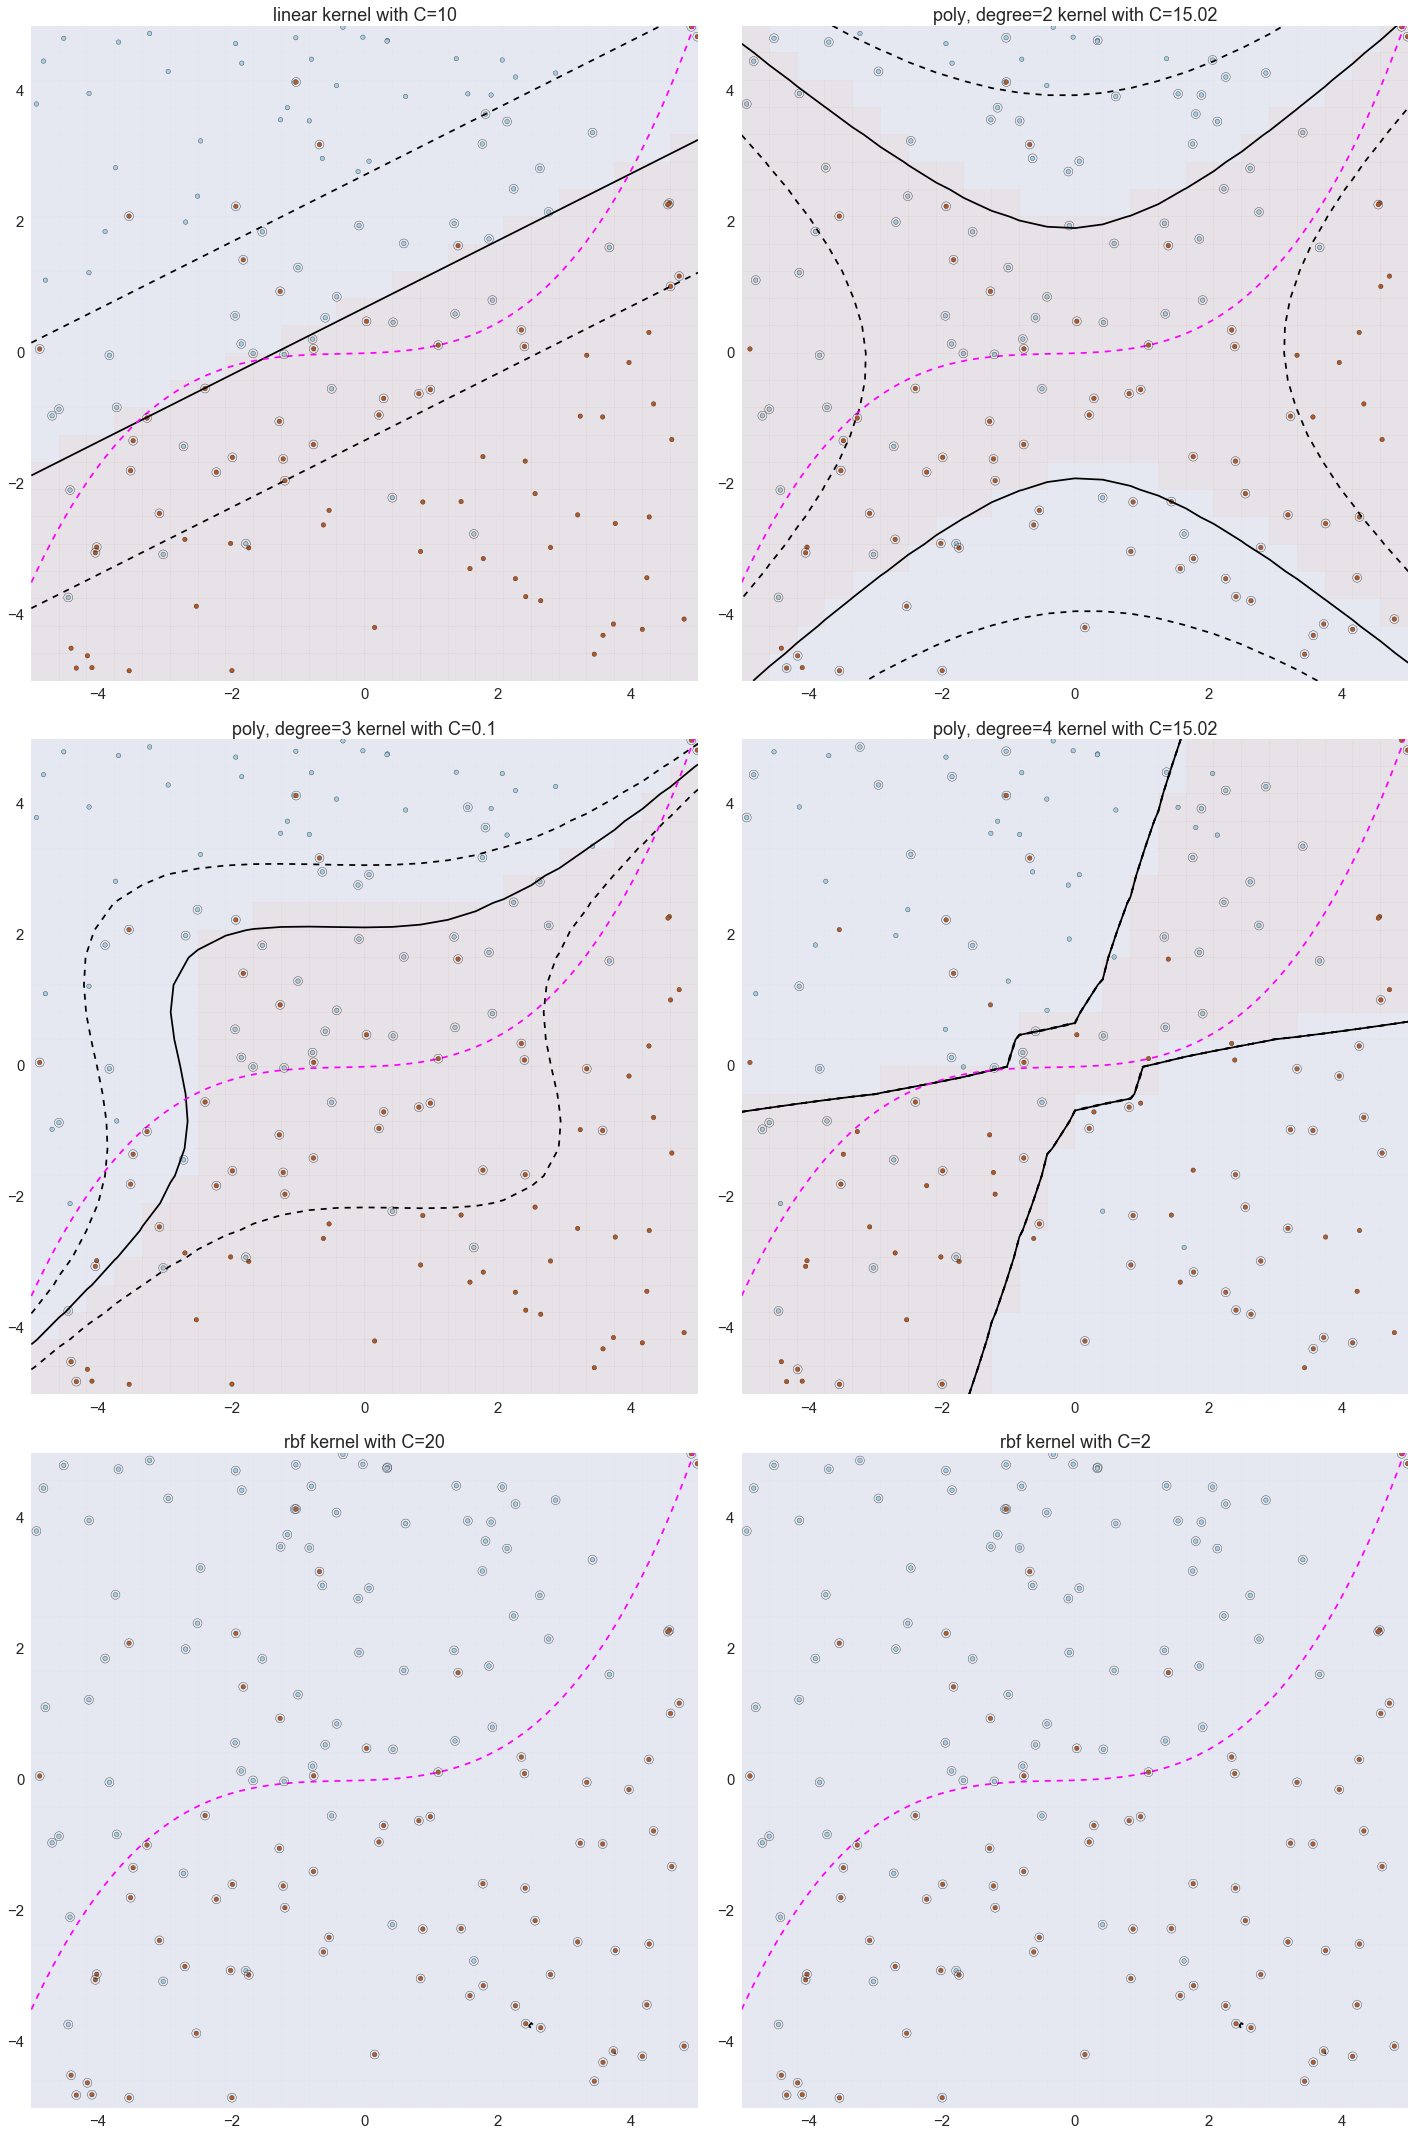

In [92]:
svc_for_two_class_optimized()

### Wybór C i funkcji jądra
* bardzo istotny jest wybór właściwego $C$
  * zwykle należy sprawdzić szereg wartości przed wyborem
  * przedział wartości może być uzależniony od wyboru funkcji kernela
  * równoważne do wyboru C jest ustalenie warunku
  $$\sum_n\alpha_n\geq\nu$$
  dla $\nu\in[0,1]$
    * ten sposób jest czytelniejszy - w bezpośredni sposób uzależnia rozwiązanie od poziomu szumu
    
    
* podobnie ważny jest wybór funkcji jądra
  * jądra, które są funkcjami lokalnymi przyjmują wysokie wartości blisko centrum
  * dlatego istotny staje się wybór parametru $\sigma^2$ (w jądrze gausowskim)
    * jeśli aproksymowana funcja jest gładka, to można użyć wysokich wartości $\sigma$
    * jeśli zmienia się gwałtownie, małe wartości są wskazane
    * wykle potrzeba dużo danych dla wyboru poprawnych własności, co staje się problemem przy dużych wymiarach mimo, że SVM w zasadzie jest od wymiaru niezależne
  * najczęściej wypróbowuje się dużą liczbę różnych funkcji z wykorzystaniem walidacji krzyżowej dla wyboru najlepszej kombinacji
  
  
  
* badanie idą w dwóch kierunkach
  * budowy specjalnie dostosowanych do problemów funkcji jądra
    * na przykład jeśli dane mają wymiary zadane jako cechy tak/nie, to dobrym wyborem jest jądro z funkcji Jaccarda (i podobne)
  * budowy SVM wykorzystującego __kilka__ funkcji na raz
    * jądra zdefiniowane jako kombinacja liniowa innych funkcji jądra
      * konieczne zapewnienie by łączna macierz była dodatnio półokreślona
    * jako kombinacja liniowa algorytmów zbudowanych na różnych jądrach
    

### SVM dla problemów wieloklasowych
* SVM jest zdefiniowane dla problemów binarnych
* istnieje kilka standardowych podejść dla zastosowania do problemów wieloklasowych
  * __one_against_all__ 
    * budowanych jest $K$ modeli $f_k(x)$
    * każdy rozpoznaje jedną klasę przeciwko pozostałym
    * wybór przez
    $$\underset{k}{\arg\max} f_k(x)$$
    * mogą być obszary w których więcej niż jeden model daje dodatnią wartość
    * pojawia się problem niezbalansowania klas
      * niech oryginalnie będzie tyle samo przykładów dla każdej klasy
      * pojedynczy model ma wtedy $(K-1)$ więcej przykładów klasy negatywnej niż pozytywnej
  * __one_against_one__
    * $K(K-1)/2$ modeli dla każdej pary klas
    * wybór przez głosowanie
    * wadą dużo uczenia oraz często niejednoznaczności wyboru
  * __Error_Correcting_Codes ECOC__
    * każdy indywidualny model uczy się rozpoznawania (w przybliżeniu) połowy klas wzgledem reszty
    * uczonych jest kilkanaście takich (różnych) modeli
    * wybór przez głosowanie
    

### Złożoność obliczeniowa

* problem jest rozpoznawany przez programowanie kwadratowe
  * ma złożoność rzędu $\mathcal{O}(N^3)$
  * problem może być rozłożony na wiele mniejszych
    * sekwencja mniejszych problemów
    * zwykle daje złożoność od $\mathcal{O}(N)$ do $\mathcal{O}(N^{2.3})$
* problemem jest często konieczność przechowywania wszystkich danych (wartości macierzy Grama) w pamięci
  * rozwiązanie przez podział na bloki (chunking)

## Postać rozwiązania dla modelu liniowej regresji

* model liniowy ma funkcję __energii__
$$\mathbb{E}(\theta)=\frac{1}{2}\sum_k(\theta^T\phi(x)_k-y_k)^2+\frac{\lambda}{2}\theta^T\theta$$
* stąd rozwiązanie dla __minimalizacji__ $\mathbb{E}(\theta)$
$$\begin{align}
\frac{\nabla\mathbb{E}}{\nabla \theta}&=\sum_k(\theta^T\phi(x)_k-y_k)\phi(x_k)+\lambda{}\theta\\
\theta&=-\frac{1}{\lambda}\sum_k(\theta^T\phi(x)_k-y_k)\phi(x_k)\\
&\hskip{30ex}\text{niech}\;u_k=-\frac{1}{\lambda}(\theta^T\phi(x)_k-y_k)\tag{**}\\
&=\sum_ku_k\phi(x_k)\\
\theta&=\Phi^Tu
\end{align}$$
* stąd nowa postać funkcji kosztu $\mathbb{E}(\theta)=\mathbb{E}(u)$
$$\begin{align}
\mathbb{E}(u)&=\frac{1}{2}\sum_k(u)\Phi^Tu\phi(x_n)-y_n)^2+\frac{\lambda}{2}u^T\Phi\Phi^Tu\\
&=\frac{1}{2}u^T\Phi\Phi^T\Phi\Phi^Tu-u^T\Phi\Phi^TY+\frac{1}{2}YY^T+\frac{\lambda}{2}u^T\Phi\Phi^Tu\\
&\hskip{11ex}\text{macierz}\; K=\Phi\Phi^T\; \text{jest symetryczną macierzą Grama}\\
&=\frac{1}{2}u^TKKu-u^TKY+\frac{1}{2}YY^T+\frac{\lambda}{2}u^TKu
\end{align}$$
* z (**) i $\theta=\Phi^Tu$
$$\begin{align}u=-\frac{1}{\lambda}(\theta^T\Phi-Y)&=-\frac{1}{\lambda}(u^T\Phi\Phi^T-Y)\\
&=-\frac{1}{\lambda}(u^TK-Y)\\
-\lambda u&=u^TK-Y\\
Y=u(K+\lambda{}I)\\
u=(K+\lambda{}I)^{-1}Y
\end{align}$$
co odpowiada rozwiązaniu w postaci __dualnej__
$$\boxed{
\begin{align}
\hat{y}(x)&=\theta^T\phi(x)\\
&=u^T\Phi\phi(x)=k(x)(K+\lambda{}I)^{-1}
\end{align}\;}$$
gdzie $k(x)=k(x,x_k)$ jest wektorem

* rozwiązanie jest podane __wyłącznie__ jako kombinacja funkcji jądra $k(x,x_k)$
* w tej postaci odwracana jest macierz $K+\lambda{}I)$
  * jest $N\times{}N$ 
  * oryginalnie odwracana była macierz $\Phi^T\Phi$ o wymiarach $N\times{}M$
  * zwykle $M<N$
  * jednak zyski przeważają nad wadami

## Ridge regression
* ridge regresja jest zdaniem minimalizacji
$$\boxed{L(\theta,\lambda)=\sum_{n=1}^N\left(y_n-\theta^Tx_n\right)^2+\lambda\|\theta\|^2\;}$$
dla $\lambda\geq0$
  * minimalizowany jest błąd modelu (pierwszy składnik) oraz norma wektora parametrów
  * takie podejście stara się __zminimalizować wpływ mniej istotnych współrzędnych przestrzeni wejściowej__
  
  
* dane są generowane przez __nieliniowy__ proces
$$y_n=g(x_n)+\eta_n$$
* możemy utworzyć __hipotezę__ $f$ wykorzystujące model
$$f(x)=\sum_{n=1}^N\theta_nk(x,x_n)$$
gdzie $k(\cdot,\cdot)$ jest funkcją jądra $$k:\mathbb{R}^l\times\mathbb{R}^l\ni(x,y)\longrightarrow{}k(x,y)\in\mathbb{R}$$
  * w takim razie
  $$L(\theta)=\sum_{n=1}^N\left(y_n-\sum_{n=1}^N\theta_nk(x,x_n)\right)^2+\lambda<f, f>$$

### $\epsilon$-czuła regresja liniowa

#### funkcja kosztu

* dla problemu regresji potrzebujemy zdefiniować $\epsilon$-czułą funkcję kosztu
  * liniowa
  $$L^{\epsilon}(x,y,f)=|y-f(x)|_{\epsilon}=\max(0, |y-f(x)|-\epsilon)$$
  * kwadratowa
  $$L_2^{\epsilon}(x,y,f)=|y-f(x)|_{\epsilon}^2=\max(0, |y-f(x)|^2-\epsilon)$$
  

In [131]:
def epsilon_insensitive():
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    xmin = -2.0; xmax = -xmin
    xx = np.linspace(xmin, xmax, 100)
    epsilon_lin=0.5
    ax.plot(xx, np.abs(xx), c='black', lw=1)
    ax.plot(xx, np.maximum(0, (np.abs(xx) - epsilon_lin)), c='black', ls="--", lw=2)
    ax.plot(xx, xx ** 2, c='orange', lw=1)
    epsilon_sqr = epsilon_lin ** 2
    ax.plot(xx, np.maximum(0, (xx ** 2 - epsilon_sqr)), c='orange', ls="--", lw=2)
    ax.set_xlim([xmin, xmax])
    
    plt.show()

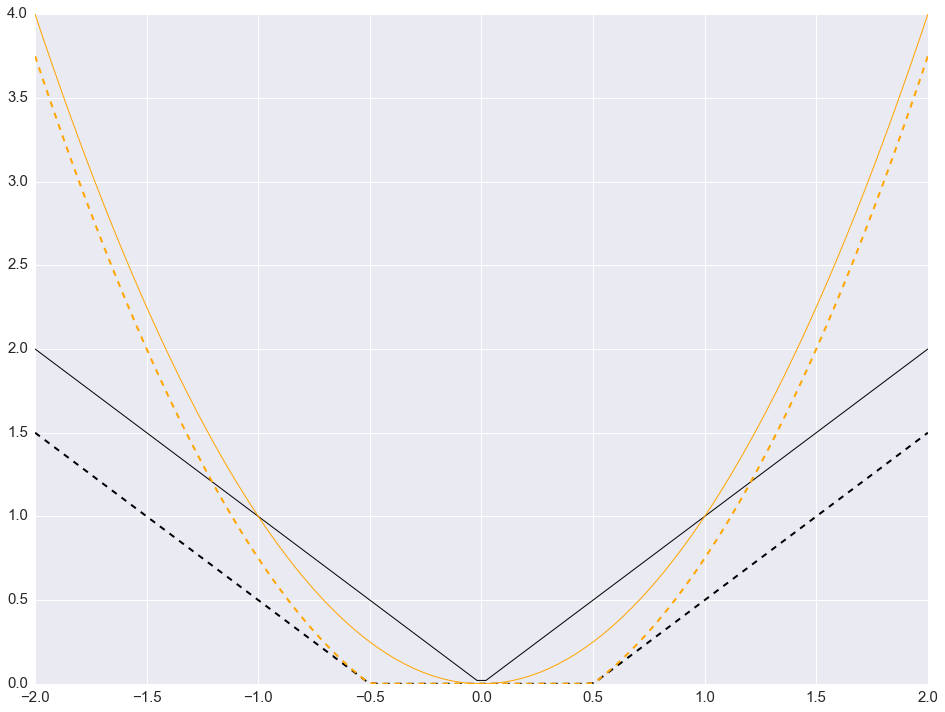

In [132]:
epsilon_insensitive()

In [114]:
xx = np.linspace(-1, 1, 10)
np.maximum(0, np.abs(xx) - 0.5)

array([ 0.5       ,  0.27777778,  0.05555556,  0.        ,  0.        ,
        0.        ,  0.        ,  0.05555556,  0.27777778,  0.5       ])

In [153]:
def svr_tube(N=50):
    def f(x):
        return (x ** 3 + x ** 2 + x) / 30.
    xmin = ymin = -5.0
    xmax = ymax = +5.0
    X = np.array(np.random.uniform(low=xmin, high=xmax, size=N)).reshape(-1)
    Y = f(X) + np.random.normal(scale=0.5, size=N)
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    xx = np.linspace(xmin, xmax, 100)
    ax.plot(xx, f(xx), c='black', lw=2)
    epsilon = 0.5
    ax.plot(xx, f(xx) - epsilon, c='black', ls='--', lw=1)
    ax.plot(xx, f(xx) + epsilon, c='black', ls='--', lw=1)
    ax.fill_between(xx, f(xx) - epsilon, f(xx) + epsilon, facecolor='grey', alpha=0.2)
    ax.scatter(X, Y)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    
    plt.show()

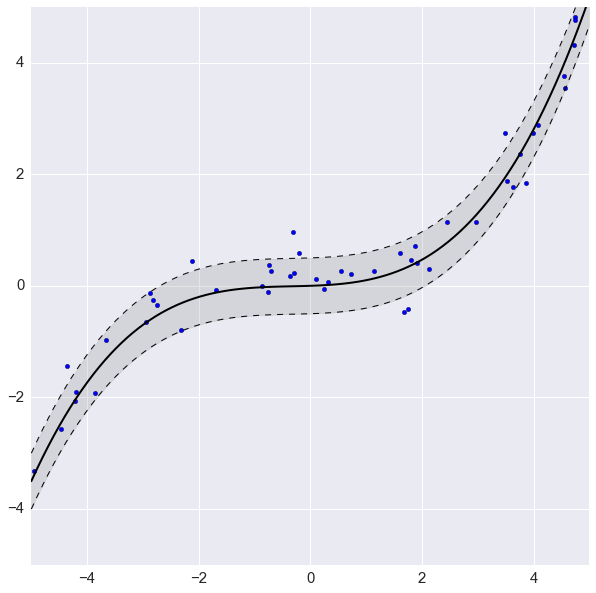

In [154]:
svr_tube()

#### Model

* dla optymalizacji regresji potrzebujemy zminimalizować (dla kwadratowej funkcji kosztu)
$$\|\theta\|^2+\sum_{n=1}^NL_2^{\epsilon}(x_n,y_n,f)$$
co prowadzi do następującego problemu pierwotnego
$$\boxed{\begin{align}
\text{minimalizuj}&\|\theta\|^2+C\sum_{n=1}^N(\hat{\xi}_{n}^2+\xi_{n}^2)\\
\text{pod warunkiem}&(<\theta,x_n>+\theta_0)-y_n<\epsilon+\hat{\xi}_{i}\\
&y_n-(<\theta,x_n>+\theta_0)<\epsilon+\xi_{i}\\
&\xi_n, \hat{\xi}_n\geq0 \forall\;n
\end{align}\;}$$
gdzie $\xi$ i $\hat{\xi}$ oznaczają zmienne rozluźniające (ang. slack) odpowiedzialne za błąd gdy 
  * wartość przybliżenia jest __większa__ od prawdziwej wartości o $\epsilon$ powiększone o $\xi$
  * wartość przybliżenia jest __mniejsza__ od prawidłowej wartości o $\epsilon$ powiększone o $\xi$
  * łatwo zauważyć, że $\xi_n\hat{\xi}_n=0$
  
  
* problem dualny można zdefiniować analogicznie jak wcześniej przez wzięcie pod uwagę warunków KKT
$$\begin{align}
    \left.\frac{\partial}{\partial\theta}L(\theta,\alpha)\right|_{\theta=\theta^{\ast}}&=0\\
    \alpha_n&\geq0\hspace{2ex}\forall\;n\\
    \alpha_n f(\theta^{\ast})&=0\hspace{2ex}\forall\;n
    \end{align}$$
otrzymując
$$\begin{align}
L()=&\frac{1}{2}\|\theta\|^2+C\left(\sum_n\xi_n+\sum_n\hat{\xi}_n\right)\\
&+\sum_n{\alpha}_n(y_n-\theta^Tx_n-\theta_0-\epsilon-{\xi}_n)\\
&+\sum_n\hat{\alpha}_n(\theta^Tx_n+\theta_0-y_n-\epsilon-\hat{\xi}_n)\\
&-\sum_n\hat\mu_n\hat\xi_n-\sum_n\mu_n\xi_n
\end{align}$$
przy czym $\displaystyle \hat\xi_n\xi_n=0\hspace{2ex}\hat\alpha_n\alpha_n=0$

---

* biorąc pochodne, przyrównując do zera i wstawiając dostajemy postać dualną
$$\begin{align}
\text{minimalizuj}&\hspace{1ex}\sum_n(\hat\alpha_n-\alpha_n)y_n-\epsilon(\hat\alpha_n+\alpha_n)\\
&\hspace{1ex}-\sum_n\sum_k(\hat\alpha_n-\alpha_n)(\hat\alpha_n-\alpha_n)x_n^Tx_k\\
\text{pod warunkiem}&\hspace{1ex}0\leq\hat\alpha_n,\,\alpha_n\leq{}C\\
&\hspace{1ex}\sum_n\hat\alpha_n=\sum_n\alpha_n
\end{align}$$


In [193]:
def svr(N=50):
    def f(x):
        return (x ** 3 + x ** 2 + x) / 30.
    xmin = ymin = -5.0
    xmax = ymax = +5.0
    X = np.array(np.random.uniform(low=xmin, high=xmax, size=N)).reshape((N, 1))
    Y = f(X) + np.random.normal(scale=0.75, size=N).reshape((N, 1))
    # fit the model
    kernels = (str('linear'), str('poly'), str('poly'), str('poly'),
               str('rbf'), str('rbf'))
    degrees = (1, 2, 3, 4, 0, 0)
    c_values = (10, 10, 10, 10, 20, 2)
    fig, ax = plt.subplots(len(kernels) / 2, 2, figsize=(20, 30))
    xx = np.linspace(xmin, xmax, 100)  
    
    if len(kernels) != len(degrees) or len(kernels) != len(c_values):
        return
    epsilon = 0.15
    for n, kernel, c, degree in zip(range(len(kernels)), 
                                    kernels,
                                    c_values,
                                    degrees
                                   ):
        best_err = 100. * X.shape[0]
        best_c = c
        for try_c in (0.1, 5., 7., 10., 13., 17., 21., 24., 27., 30.):
            clf = SVR(kernel=kernel, gamma='auto', degree=degree, C=try_c)
            clf.fit(X, Y)
            err = clf.score(X, Y)
            print("{} ({}) c={} --> {}".format(kernel, degree, try_c, err))
            if np.abs(err) < best_err:
                best_err = np.abs(err)
                best_c = try_c
                
        clf = SVR(kernel=kernel, gamma=20, degree=degree, C=best_c)
        clf.fit(X, Y)

        row = n / 2; col = n % 2
        ax[row, col].scatter(X, Y, edgecolors='k', cmap=plt.cm.Paired)
        ax[row, col].plot(xx, f(xx), ls='--', c='magenta')
        ax[row, col].set_xlim([xmin, xmax])
        ax[row, col].set_ylim([ymin, ymax])
        # print('SV ({}): {}'.format(clf.support_vectors_.shape, clf.support_vectors_))
        # ax[row, col].scatter(clf.support_vectors_[:, 0], 
        #                      clf.support_vectors_[:, 1], s=80,
        #                      facecolors='none', zorder=10)
        yy = clf.predict(xx.reshape((len(xx), 1)))
        ax[row, col].plot(xx, yy, c='orange', ls='--', lw=2)
        title = '{} kernel with C={}'.format(kernel, c)
        if kernel == str('poly'):
            title = '{}, degree={} kernel with C={}'.format(kernel, degree, 
                                                            np.round(best_c, 2))
        ax[row, col].set_title(title)
        
    fig.tight_layout()
    plt.show()

/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y wa

linear (1) c=0.1 --> 0.615122924668
linear (1) c=5.0 --> 0.625891693597
linear (1) c=7.0 --> 0.625892012525
linear (1) c=10.0 --> 0.625892488347
linear (1) c=13.0 --> 0.625892964241
linear (1) c=17.0 --> 0.625893597964
linear (1) c=21.0 --> 0.625894233157
linear (1) c=24.0 --> 0.625894709008
linear (1) c=27.0 --> 0.625895184782
linear (1) c=30.0 --> 0.625895660479
poly (2) c=0.1 --> -0.0648359947099
poly (2) c=5.0 --> -0.0648402072293
poly (2) c=7.0 --> -0.0648419263464
poly (2) c=10.0 --> -0.0648445065983
poly (2) c=13.0 --> -0.0648470869177
poly (2) c=17.0 --> -0.0648505254172
poly (2) c=21.0 --> -0.0648539625258
poly (2) c=24.0 --> -0.0648565415573
poly (2) c=27.0 --> -0.0648591221845
poly (2) c=30.0 --> -0.0648617028833
poly (3) c=0.1 --> 0.741814728275
poly (3) c=5.0 --> 0.741861362227
poly (3) c=7.0 --> 0.741888825951


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (3) c=10.0 --> 0.741942419666
poly (3) c=13.0 --> 0.742028188953


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (3) c=17.0 --> 0.742057421526


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (3) c=21.0 --> 0.742077312884


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (3) c=24.0 --> 0.742113323142


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (3) c=27.0 --> 0.742129014716


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (3) c=30.0 --> 0.742150078276


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (4) c=0.1 --> -0.185832355116
poly (4) c=5.0 --> -0.173884226525


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (4) c=7.0 --> -0.169120132392


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (4) c=10.0 --> -0.162096483784


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (4) c=13.0 --> -0.156286679495


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (4) c=17.0 --> -0.155407134637


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (4) c=21.0 --> -0.15453003784


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (4) c=24.0 --> -0.153873817478


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (4) c=27.0 --> -0.153218980102


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)


poly (4) c=30.0 --> -0.152565516326


/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64)
/Users/igorpodolak/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:216: DataConversionWarning: A column-vector y wa

rbf (0) c=0.1 --> 0.400537535478
rbf (0) c=5.0 --> 0.8021861145
rbf (0) c=7.0 --> 0.804289862087
rbf (0) c=10.0 --> 0.805886609686
rbf (0) c=13.0 --> 0.805184819922
rbf (0) c=17.0 --> 0.804418133814
rbf (0) c=21.0 --> 0.805386383747
rbf (0) c=24.0 --> 0.805336300079
rbf (0) c=27.0 --> 0.805177803549
rbf (0) c=30.0 --> 0.804982367836
rbf (0) c=0.1 --> 0.400537535478
rbf (0) c=5.0 --> 0.8021861145
rbf (0) c=7.0 --> 0.804289862087
rbf (0) c=10.0 --> 0.805886609686
rbf (0) c=13.0 --> 0.805184819922
rbf (0) c=17.0 --> 0.804418133814
rbf (0) c=21.0 --> 0.805386383747
rbf (0) c=24.0 --> 0.805336300079
rbf (0) c=27.0 --> 0.805177803549
rbf (0) c=30.0 --> 0.804982367836


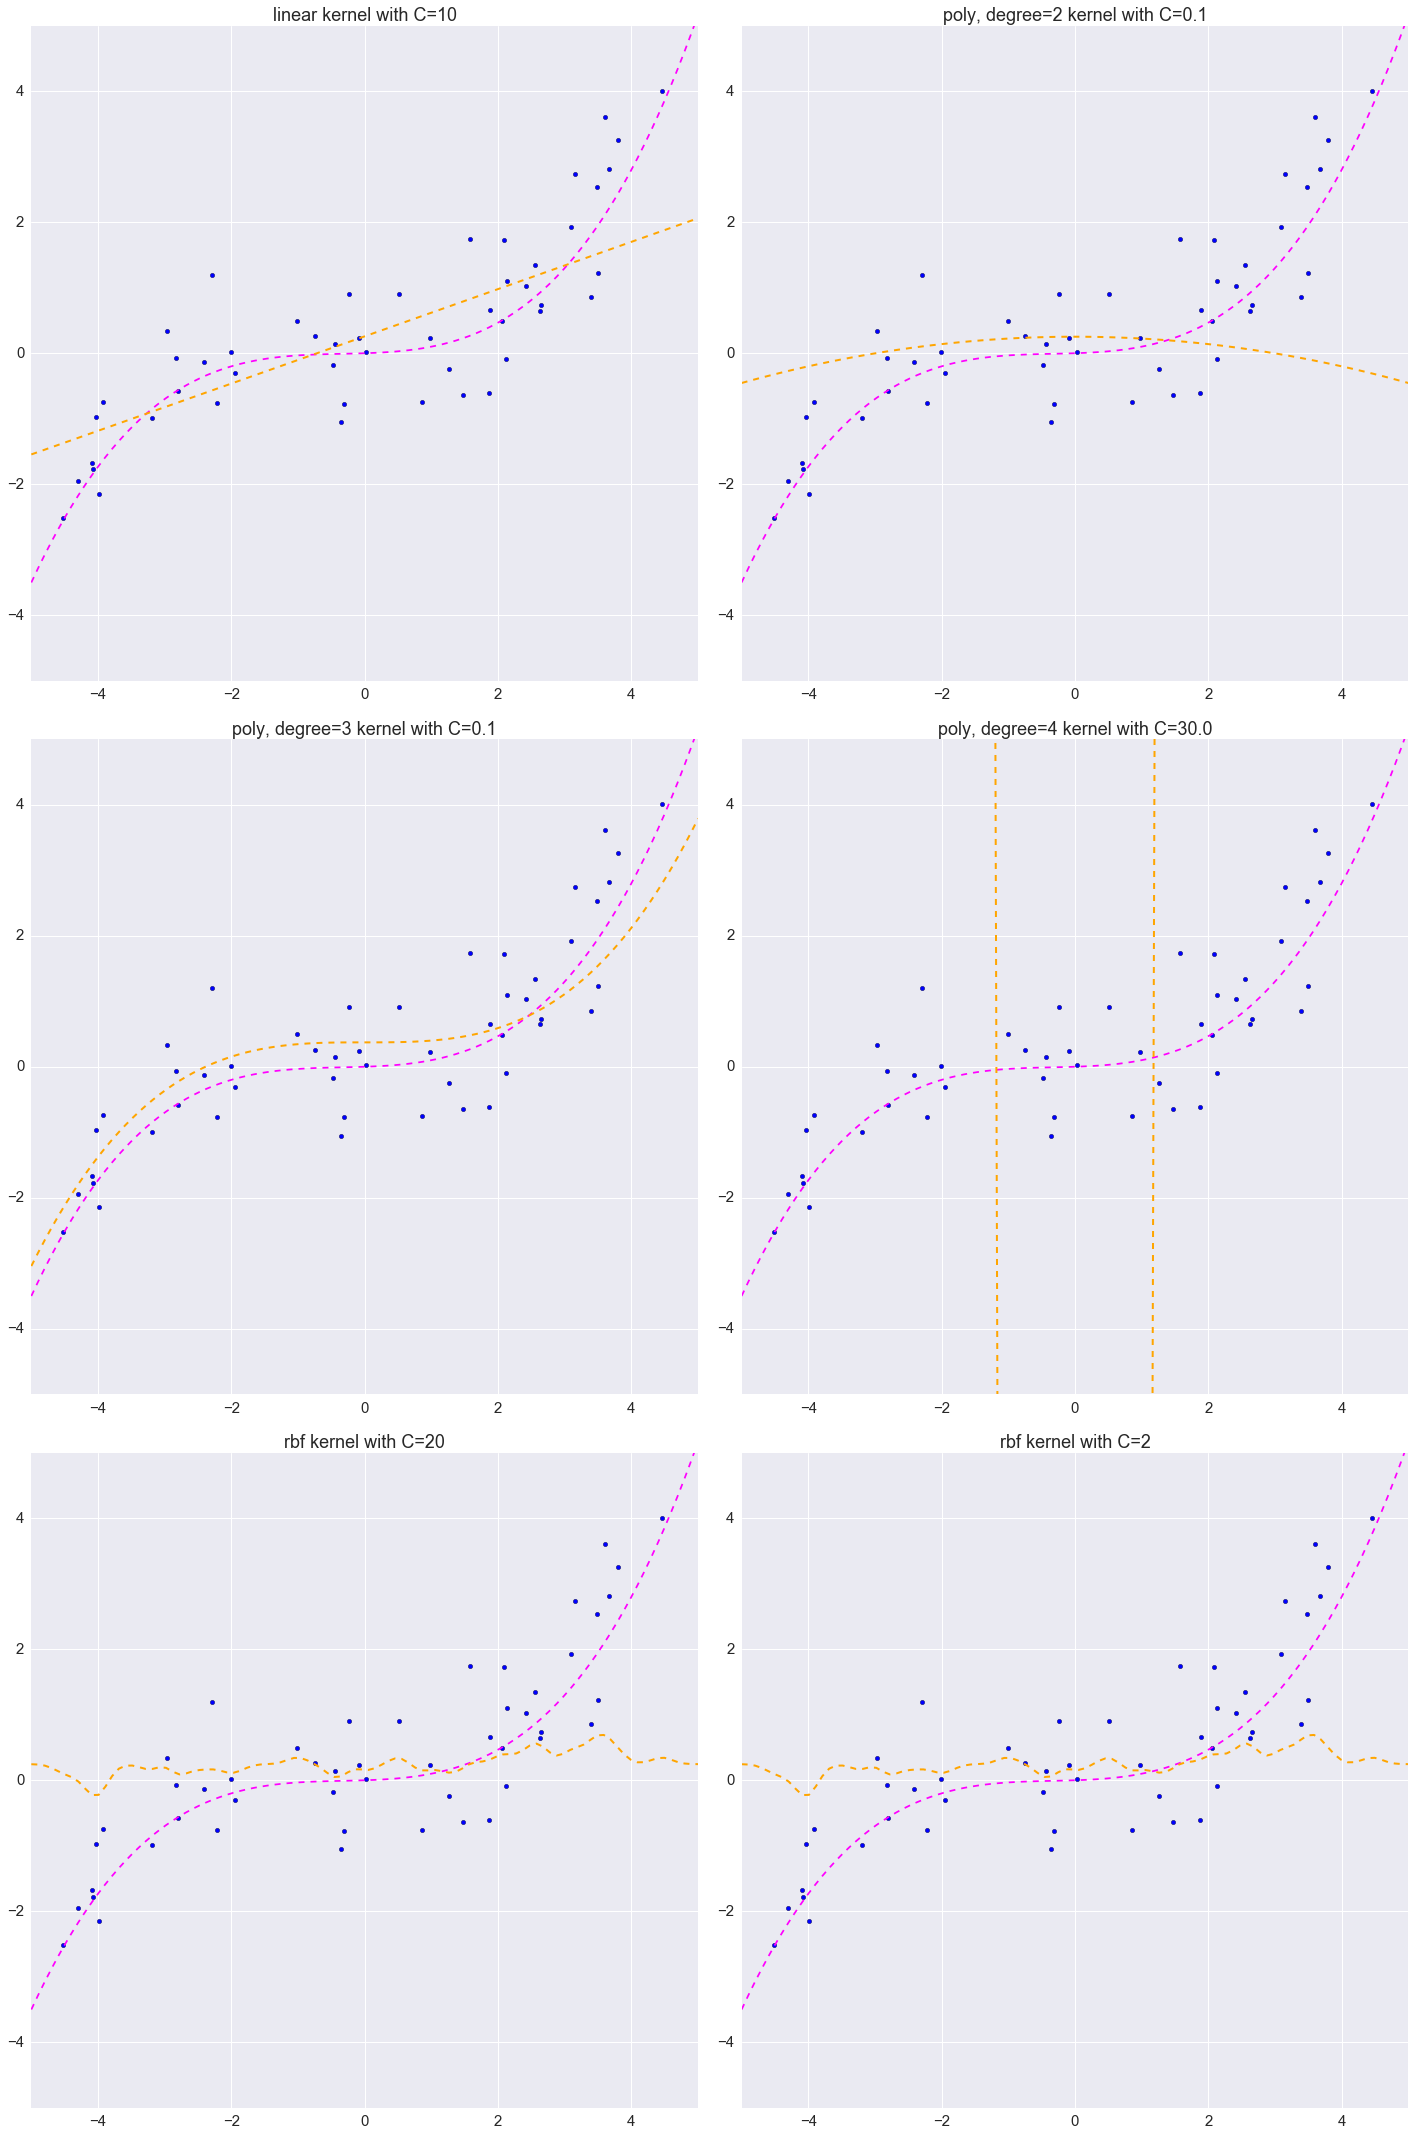

In [194]:
svr()